# Context

Typically e-commerce datasets are proprietary and consequently hard to find among publicly available data.
This is a transactional data set that contains all the transactions occurring in online retail.
Ecommerce data contains information relating to the visitors and performance of an online shop. It's mostly used by marketers e.g. in understanding consumer behavior and enhancing conversion funnels.

# Objective

The objective is to find out the features which have the most information context to differentiate the positive class and negative class and also build a model to predict whether a customer will buy a product or not.

# Dataset

The data contains information on web sessions of a customer:

--------------------------------------
- **"Administrative", "Administrative Duration", "Informational", "Informational Duration", "Product Related" and "Product Related Duration"**: These represent the number of different types of pages visited by the visitor in that session and total time spent in each of these page categories.
- The values of these features are derived from the URL information of the pages visited by the user and updated in real-time when a user takes an action, e.g. moving from one page to another.
--------------------------------------
- The **"Bounce Rate", "Exit Rate" and "Page Value"** features represent the metrics measured by "Google Analytics" for each page in the e-commerce site.
- **Bounce Rate:** The value of "Bounce Rate" feature for a web page refers to the percentage of visitors who enter the site from that page and then leave ("bounce") without triggering any other requests to the analytics server during that session.

- **Exit Rate:** The value of "Exit Rate" feature for a specific web page is calculated as for all pageviews to the page, the percentage that was the last in the session.

- Dataset has average bounce rates and exit rates for a page customer landed on.

Read more about **Bounce Rate** vs **Exit Rate** [here](https://support.google.com/analytics/answer/2525491?hl=en&ref_topic=6156780)
- **Page Value:** The "Page Value" feature represents the average value for a web page that a user visited before completing an e-commerce transaction.

Read more about **Page Value** [here](https://support.google.com/analytics/answer/2695658?hl=en).

--------------------------------------
- **Special Day:** The "Special Day" feature indicates the closeness of the site visiting time to a specific special day (e.g. Mother’s Day, Valentine's Day) in which the sessions are more likely to be finalized with the transaction.
- The value of this attribute is determined by considering the dynamics of e-commerce such as the duration between the order date and delivery date.
- For example, for Valentina’s day, this value takes a nonzero value between February 2 and February 12, zero before and after this date unless it is close to another special day, and its maximum value of 1 on February 8.
--------------------------------------
- The dataset also includes the operating system, browser, region, traffic type - these values are masked.

- VisitorType: returning visitor, new visitor, or other types of customer. 
- weekend: a Boolean value indicating whether the date of the visit is weekend or not 
- month: month of the year

### Import necessary libraries

In [1]:
# this will help in making the Python code more structured automatically (good coding practice)
%load_ext nb_black

# Library to suppress warnings or deprecation notes
import warnings

warnings.filterwarnings("ignore")

# Libraries to help with reading and manipulating data

import pandas as pd
import numpy as np

# Library to split data
from sklearn.model_selection import train_test_split

# libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 200)

# Libraries to build decision tree classifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

# To tune different models
from sklearn.model_selection import GridSearchCV

# To get diferent metric scores
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    plot_confusion_matrix,
    make_scorer,
)

<IPython.core.display.Javascript object>

### Note: The first section of the notebook is the section that has been covered multiple times in the previous case studies.  For this discussion this part can be skipped and we can directly refer to this **<a href = #link1>summary</a>** of data description and observations from EDA.

### Read the dataset

In [3]:
shoppers = pd.read_csv("online_shoppers_intention_given.csv")

<IPython.core.display.Javascript object>

In [4]:
# copying data to another varaible to avoid any changes to original data
data = shoppers.copy()

<IPython.core.display.Javascript object>

### View the first and last 5 rows of the dataset.

In [5]:
data.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


<IPython.core.display.Javascript object>

In [6]:
data.tail()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
12325,3,145.0,0,0.0,53,1783.791667,0.007143,0.029031,12.241717,0.0,Dec,4,6,1,1,Returning_Visitor,True,False
12326,0,0.0,0,0.0,5,465.750000,0.000000,0.021333,0.000000,0.0,Nov,3,2,1,8,Returning_Visitor,True,False
12327,0,0.0,0,0.0,6,184.250000,0.083333,0.086667,0.000000,0.0,Nov,3,2,1,13,Returning_Visitor,True,False
12328,4,75.0,0,0.0,15,346.000000,0.000000,0.021053,0.000000,0.0,Nov,2,2,3,11,Returning_Visitor,False,False
12329,0,0.0,0,0.0,3,21.250000,0.000000,0.066667,0.000000,0.0,Nov,3,2,1,2,New_Visitor,True,False


<IPython.core.display.Javascript object>

### Understand the shape of the dataset.

In [7]:
data.shape

(12330, 18)

<IPython.core.display.Javascript object>

* Dataset has 12330 rows and 18 columns

### Let's check the duplicate data. And if any, we should remove it.

In [8]:
data[data.duplicated()].count()

Administrative             125
Administrative_Duration    125
Informational              125
Informational_Duration     125
ProductRelated             125
ProductRelated_Duration    125
BounceRates                125
ExitRates                  125
PageValues                 125
SpecialDay                 125
Month                      125
OperatingSystems           125
Browser                    125
Region                     125
TrafficType                125
VisitorType                125
Weekend                    125
Revenue                    125
dtype: int64

<IPython.core.display.Javascript object>

* There are 125 duplicate values in the dataset

#### Let's drop the duplicate values

In [9]:
data.drop_duplicates(inplace=True)

<IPython.core.display.Javascript object>

### Check the data types of the columns for the dataset.

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12205 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12205 non-null  int64  
 1   Administrative_Duration  12205 non-null  float64
 2   Informational            12205 non-null  int64  
 3   Informational_Duration   12205 non-null  float64
 4   ProductRelated           12205 non-null  int64  
 5   ProductRelated_Duration  12205 non-null  float64
 6   BounceRates              12205 non-null  float64
 7   ExitRates                12205 non-null  float64
 8   PageValues               12205 non-null  float64
 9   SpecialDay               12205 non-null  float64
 10  Month                    12205 non-null  object 
 11  OperatingSystems         12205 non-null  int64  
 12  Browser                  12205 non-null  int64  
 13  Region                   12205 non-null  int64  
 14  TrafficType           

<IPython.core.display.Javascript object>

### Insights:

- Most of the data-types are either **int64** or **float64**.
- 2 columns - Month and VisitorType are having data-types as an **object**, this means we need to convert these into suitable data-type before we feed our data into the model.
- The last two columns: "Weekend" and "Revenue", have the data-type as a **bool**.

### Think about it:

- We already know that we convert the categorical data-types into suitable form using either the "LabelEncoder" or "OneHotEncoding".
- But here we have a **bool** data type. What should we do here?
- In Python, True and False are cast implicitly into integers:

    `True == 1`
    
    `False == 0`
    
    This means that an algorithm running in Python should work without conversion.

### Check for missing values

In [11]:
data.isnull().sum()

Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64

<IPython.core.display.Javascript object>

* There are no missing values in the data.

### Summary of the dataset

In [12]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Administrative,12205.0,2.338878,3.330436,0.0,0.000000,1.000000,4.000000,27.000000
Administrative_Duration,12205.0,81.646331,177.491845,0.0,0.000000,9.000000,94.700000,3398.750000
Informational,12205.0,0.508726,1.275617,0.0,0.000000,0.000000,0.000000,24.000000
Informational_Duration,12205.0,34.825454,141.424807,0.0,0.000000,0.000000,0.000000,2549.375000
ProductRelated,12205.0,32.045637,44.593649,0.0,8.000000,18.000000,38.000000,705.000000
ProductRelated_Duration,12205.0,1206.982457,1919.601400,0.0,193.000000,608.942857,1477.154762,63973.522230
BounceRates,12205.0,0.020370,0.045255,0.0,0.000000,0.002899,0.016667,0.200000
ExitRates,12205.0,0.041466,0.046163,0.0,0.014231,0.025000,0.048529,0.200000
PageValues,12205.0,5.949574,18.653671,0.0,0.000000,0.000000,0.000000,361.763742
SpecialDay,12205.0,0.061942,0.199666,0.0,0.000000,0.000000,0.000000,1.000000


<IPython.core.display.Javascript object>

* All the numerical variables seem to be right-skewed.
* Most time spent by customers is on the ProductRelated pages.
* There are some customers who haven't visited the administrative page and informational pages.

In [13]:
data.describe(include=["object", "bool"])

,Month,VisitorType,Weekend,Revenue
count,12205,12205,12205,12205
unique,10,3,2,2
top,May,Returning_Visitor,False,False
freq,3329,10431,9346,10297


<IPython.core.display.Javascript object>

In [14]:
cat_columns = ["Month", "VisitorType", "Weekend", "Revenue"]
for i in cat_columns:
    print(data[i].value_counts())
    print("*" * 50)

May     3329
Nov     2982
Mar     1860
Dec     1706
Oct      549
Sep      448
Aug      433
Jul      432
June     285
Feb      181
Name: Month, dtype: int64
**************************************************
Returning_Visitor    10431
New_Visitor           1693
Other                   81
Name: VisitorType, dtype: int64
**************************************************
False    9346
True     2859
Name: Weekend, dtype: int64
**************************************************
False    10297
True      1908
Name: Revenue, dtype: int64
**************************************************


<IPython.core.display.Javascript object>

* Data is of 10 months January and April's data is not available with us.
* In May the website had the most active customers.
* Most of the customers are returning type customers which is a good thing for the business.
* Most traffic on the website is generally on the weekdays.
* Website is only able to generate revenue from a small portion of customers.

### EDA

### Univariate analysis

In [15]:
def histogram_boxplot(data, feature, figsize=(15, 10), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (15,10))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

<IPython.core.display.Javascript object>

### Observations on Administrative_Duration

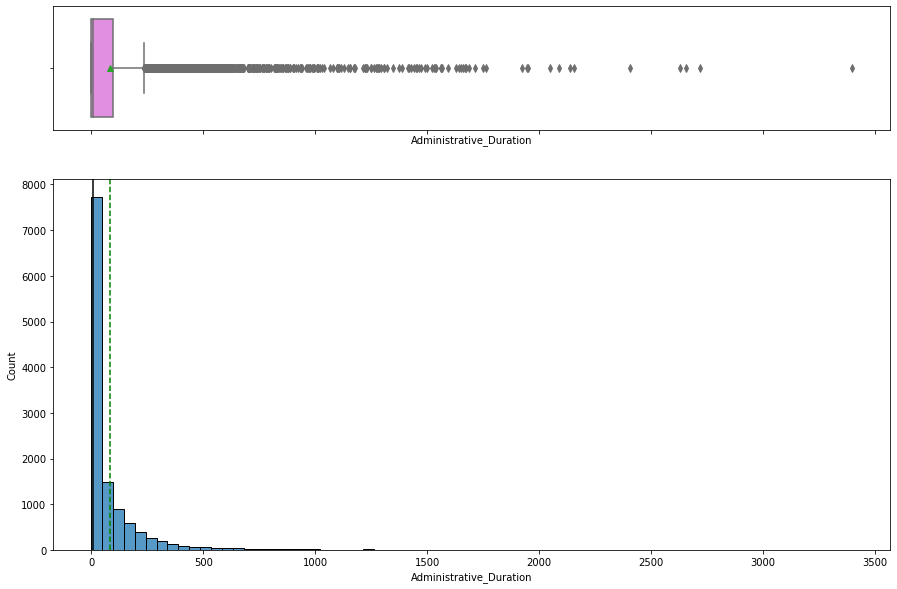

<IPython.core.display.Javascript object>

In [16]:
histogram_boxplot(data, "Administrative_Duration", bins=70)

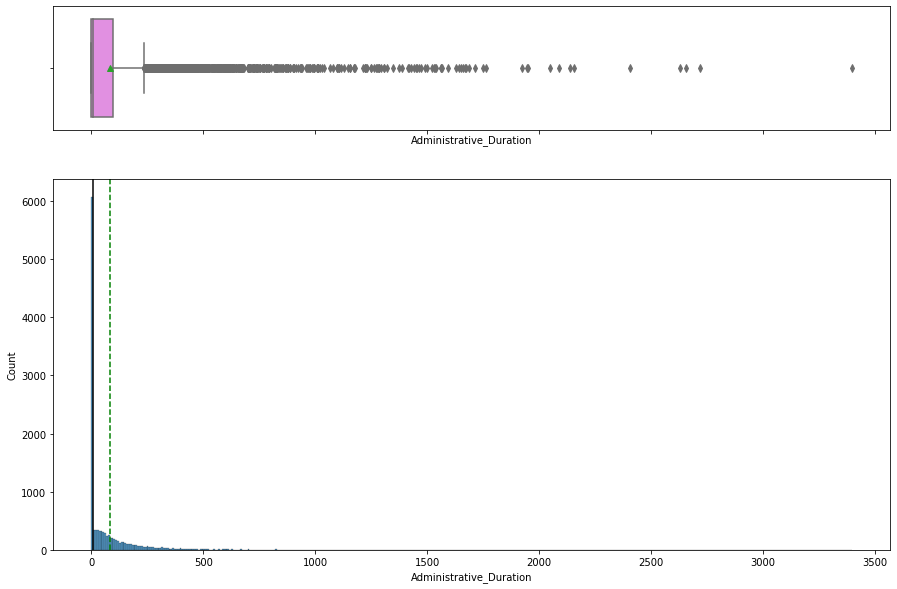

<IPython.core.display.Javascript object>

In [17]:
histogram_boxplot(data, "Administrative_Duration")

* The distribution of Administrative_Duration is right-skewed.
* There are outliers in this variable.
* From the boxplot we can see that the third quartile(Q3) is equal to 94 which means 75% of customers stay less than 94 seconds on Administrative pages in a session.

### Observations on Informational

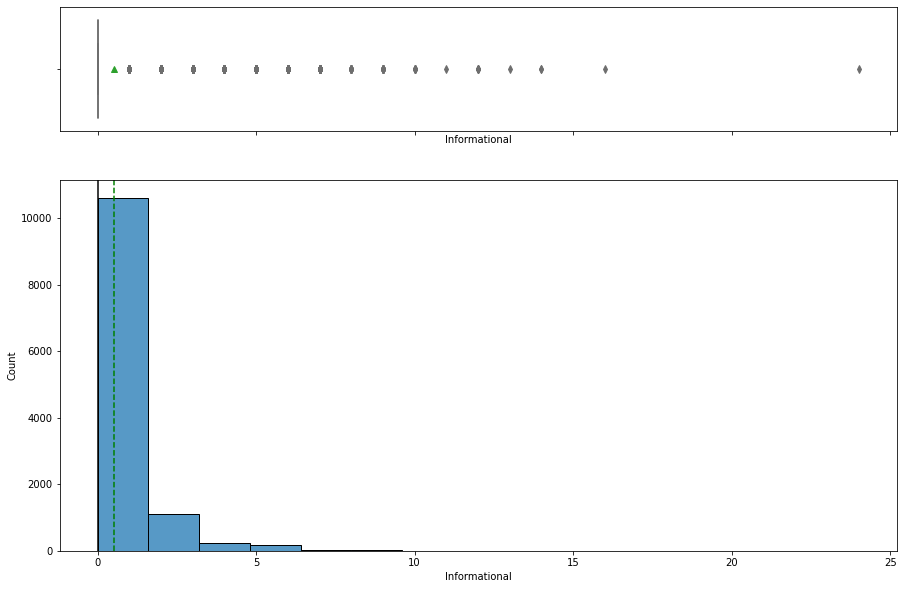

<IPython.core.display.Javascript object>

In [18]:
histogram_boxplot(data, "Informational")

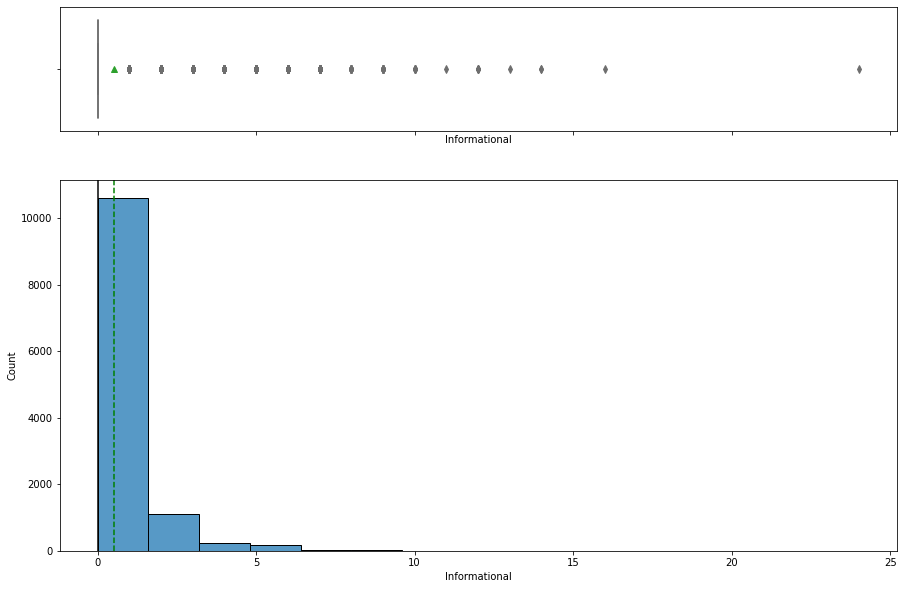

<IPython.core.display.Javascript object>

In [19]:
histogram_boxplot(data, "Informational")

* The distribution of Informational is right-skewed.
* There are outliers in this variable.
* Very few customers have visited the informational page.

### Observations on Informational_Duration

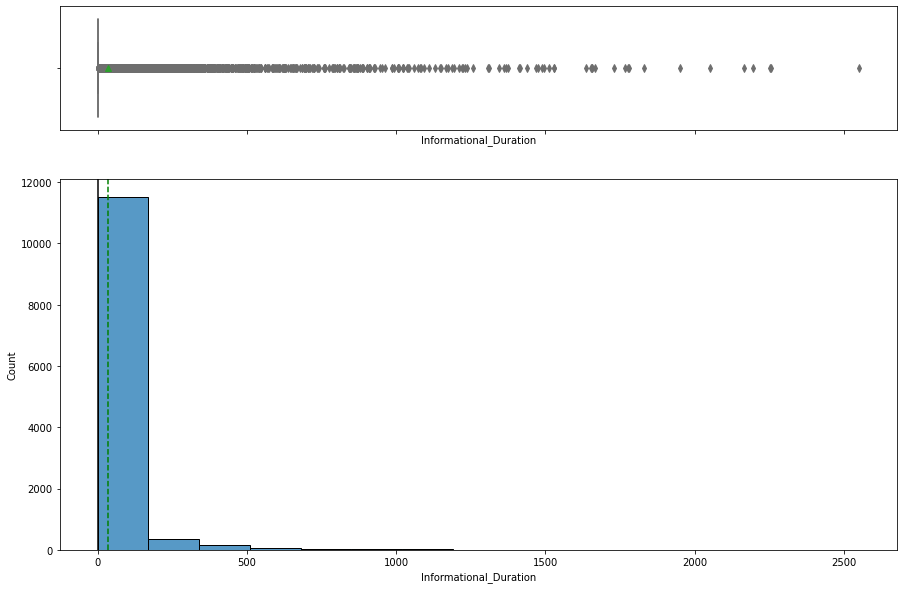

<IPython.core.display.Javascript object>

In [20]:
histogram_boxplot(data, "Informational_Duration")

* The distribution of Informational_Duration is right-skewed.
* There are outliers in this variable.
* On average customers have spent 35 seconds on the informational page.

### Observations on ProductRelated

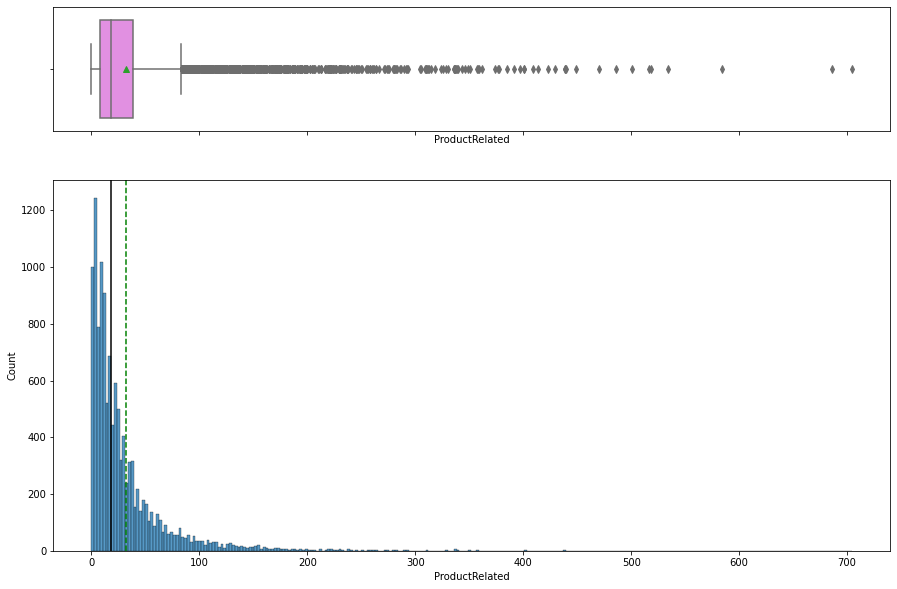

<IPython.core.display.Javascript object>

In [21]:
histogram_boxplot(data, "ProductRelated")

* The distribution of ProductRelated is right-skewed.
* There are outliers in this variable.
* From the boxplot we can see that the third quartile(Q3) is equal to 38 which means 75% of customers have visited less than 38 pages and on average a customer visits 32 pages.

### Observations on ProductRelated_Duration

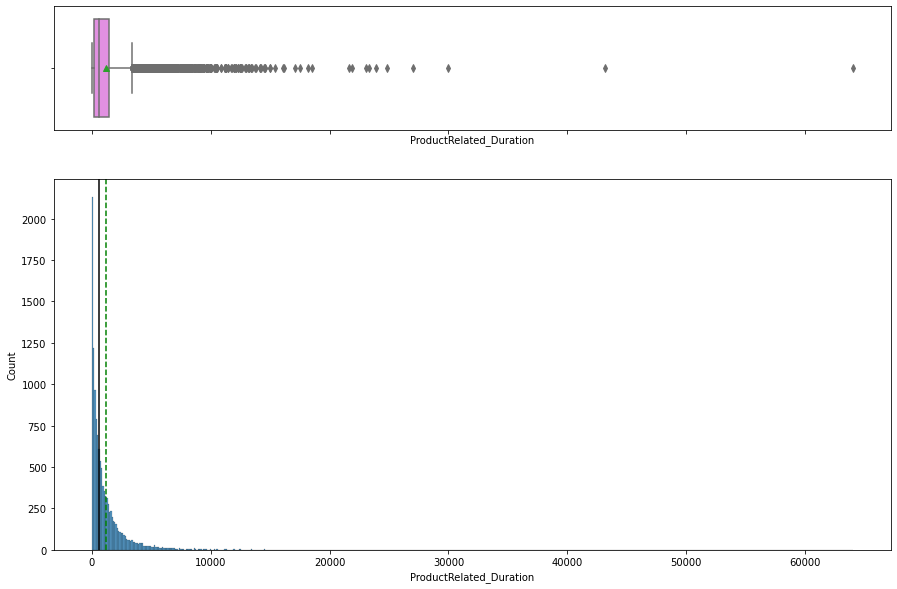

<IPython.core.display.Javascript object>

In [22]:
histogram_boxplot(data, "ProductRelated_Duration")

* The distribution of ProductRelated_Duration is right-skewed.
* There are outliers in this variable.
* On average customers have spent 1206 seconds (~20 minutes) on the ProductRelated page which is way more than the administrative page and informational page.

### Observations on BounceRates

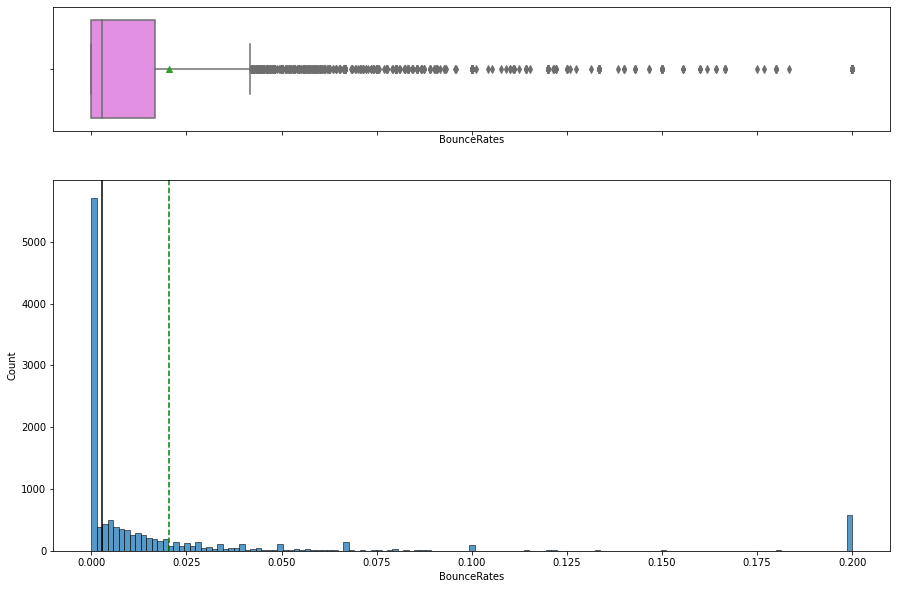

<IPython.core.display.Javascript object>

In [23]:
histogram_boxplot(data, "BounceRates")

* The distribution of BounceRates is right-skewed.
* There are outliers in this variable.
* On average the bounce rate of a webpage is 0.022.

### Observations on ExitRates

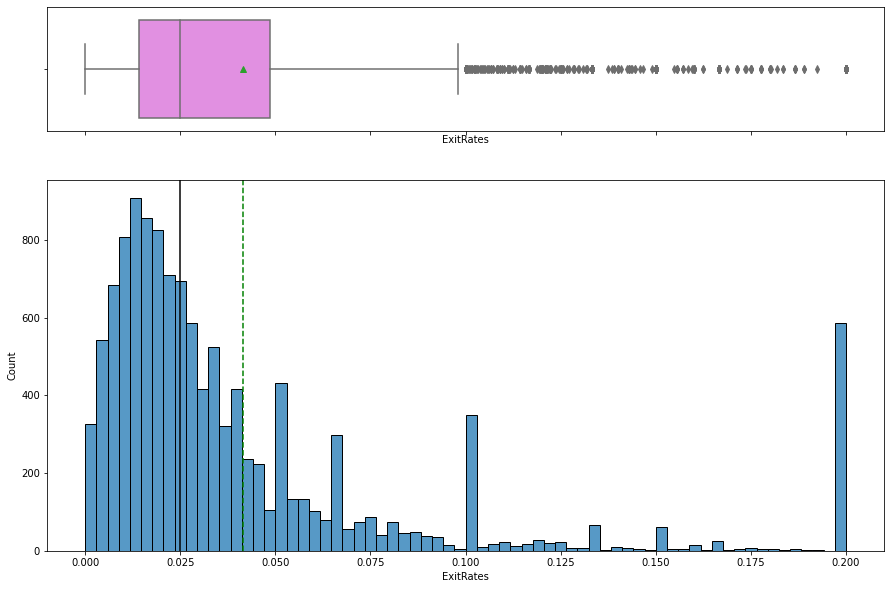

<IPython.core.display.Javascript object>

In [24]:
histogram_boxplot(data, "ExitRates")

* The distribution of ExitRates is right-skewed.
* There are outliers in this variable.
* On average the bounce rate of a webpage is 0.041.

### Observations on PageValues

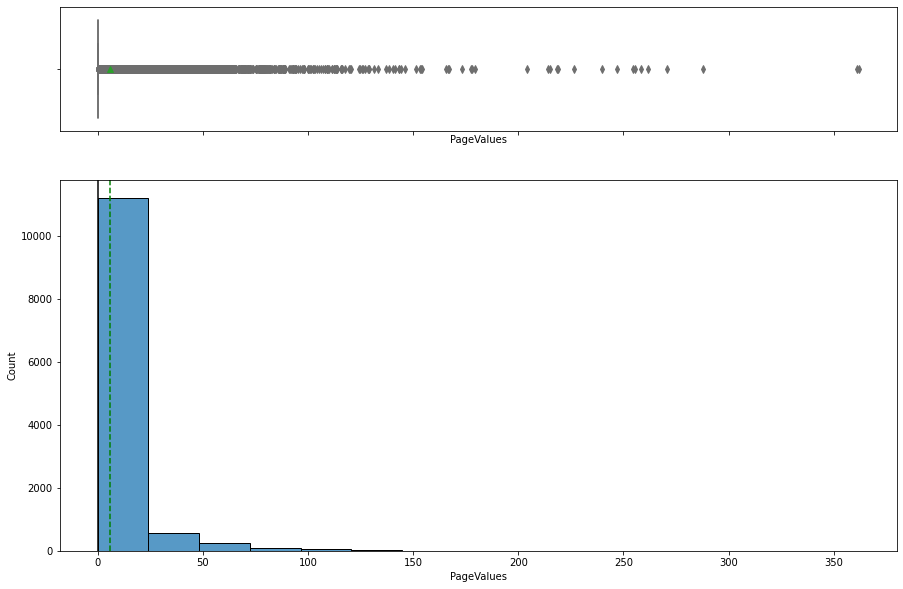

<IPython.core.display.Javascript object>

In [25]:
histogram_boxplot(data, "PageValues")

* The distribution of PageValues is right-skewed.
* There are outliers in this variable.
* On average the customers visit 6 pages before finally landing on the transaction page.

### Observations on SpecialDay

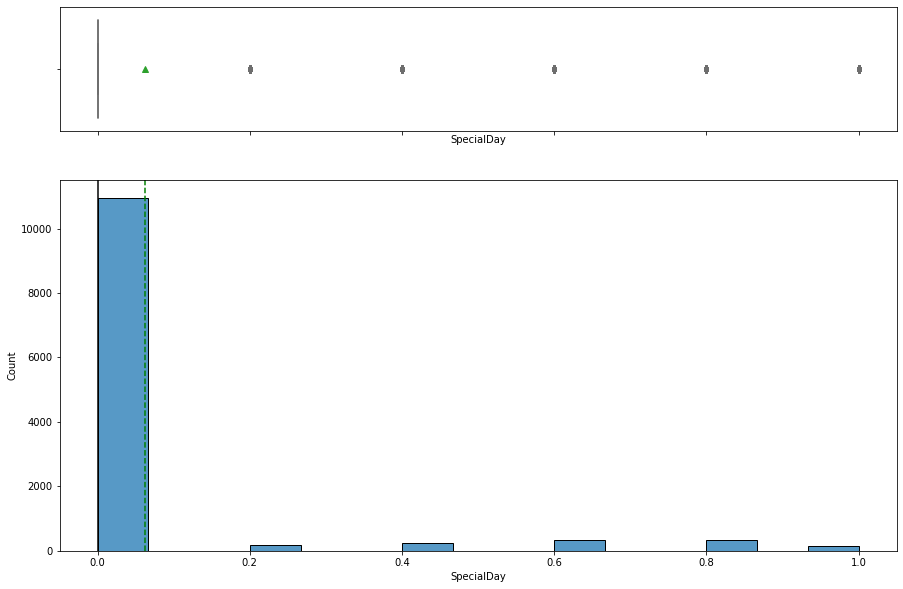

<IPython.core.display.Javascript object>

In [26]:
histogram_boxplot(data, "SpecialDay")

* The distribution of SpecialDays suggests that most customers have visited the website on days which were not close to a special occasion.
* The distribution of SpecialDays also suggests we should look at it as a category to extract more information.

### Observations on OperatingSystems

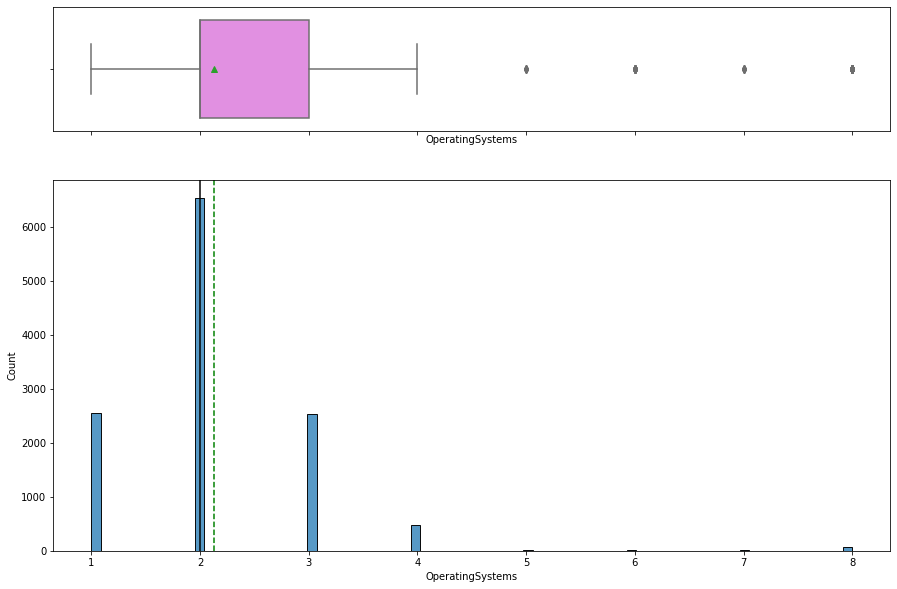

<IPython.core.display.Javascript object>

In [27]:
histogram_boxplot(data, "OperatingSystems")

* The distribution of Operating systems shows most of the customers accessed the website using 2nd operating system. 
* These values are masked so it is difficult to comment on it.
* The distribution of Operating systems also suggests we should look at it as a category to extract more information.

### Observations on Browser

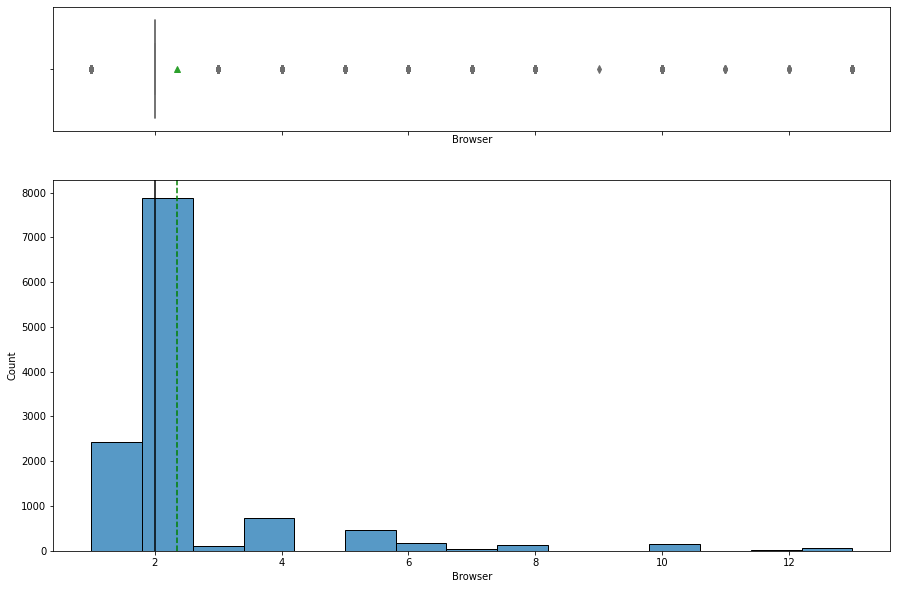

<IPython.core.display.Javascript object>

In [28]:
histogram_boxplot(data, "Browser")

* The distribution of Browser shows most of the customers accessed the website using 2nd browser. 
* These values are masked so it is difficult to comment on it.
* The distribution of Browser also suggests we should look at it as a category to extract more information.

### Observations on Region

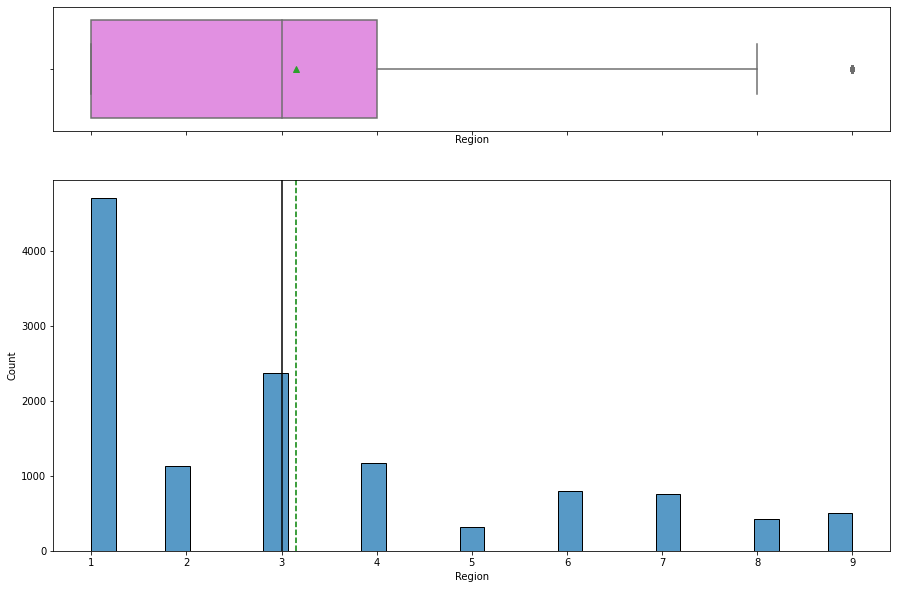

<IPython.core.display.Javascript object>

In [29]:
histogram_boxplot(data, "Region")

* The distribution of Region shows most of the customers accessed the website from Region 1. 
* These values are masked so it is difficult to comment on it.
* The distribution of Region also suggests we should look at it as a category to extract more information.

### Observations on TrafficType

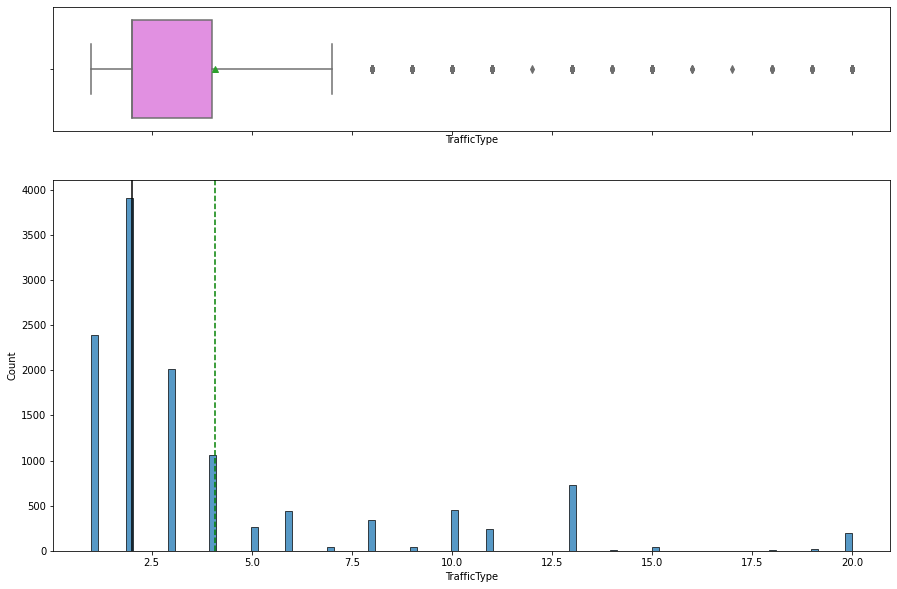

<IPython.core.display.Javascript object>

In [30]:
histogram_boxplot(data, "TrafficType")

* The distribution of TrafficType shows most of types of traffic the website gets is '2. 
* These values are masked so it is difficult to comment on it.
* The distribution of Traffic also suggests we should look at it as a category to extract more information.

In [31]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 2, 6))
    else:
        plt.figure(figsize=(n + 2, 6))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

<IPython.core.display.Javascript object>

### Observations on Month

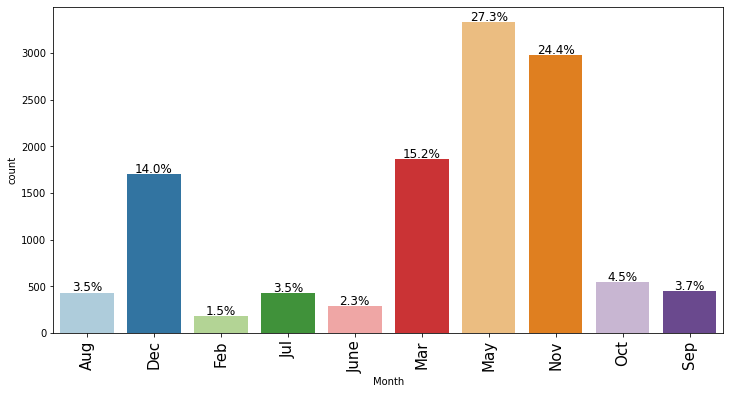

<IPython.core.display.Javascript object>

In [32]:
labeled_barplot(data, "Month", perc=True)

* 27.3% of the users visited the website in the month of May followed by November with 24.4% of traffic.

### Observations on VisitorType

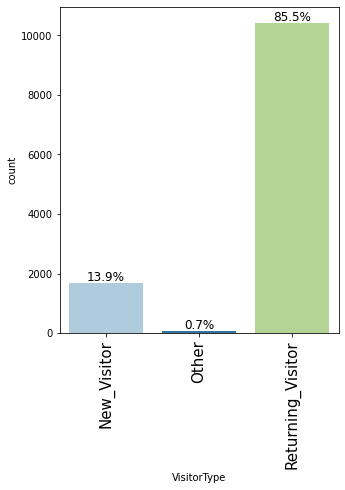

<IPython.core.display.Javascript object>

In [33]:
labeled_barplot(data, "VisitorType", perc=True)

* 85.5% of the customer are returning customers, indicating the website has a loyal base of customers.
* During these 10 months website also saw 13.9% of the customers visiting the website.

### Observations on SpecialDay

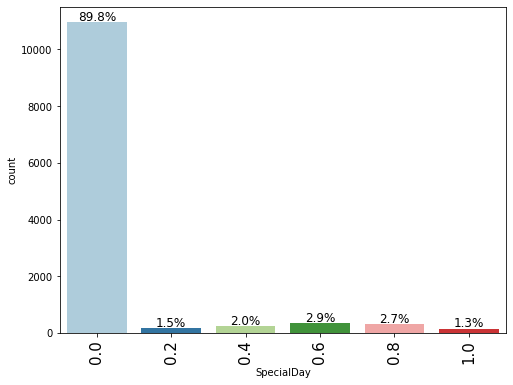

<IPython.core.display.Javascript object>

In [34]:
labeled_barplot(data, "SpecialDay", perc=True)

* 89.9% of the website sessions are on Non-Special days.

### Observations on OperatingSystems

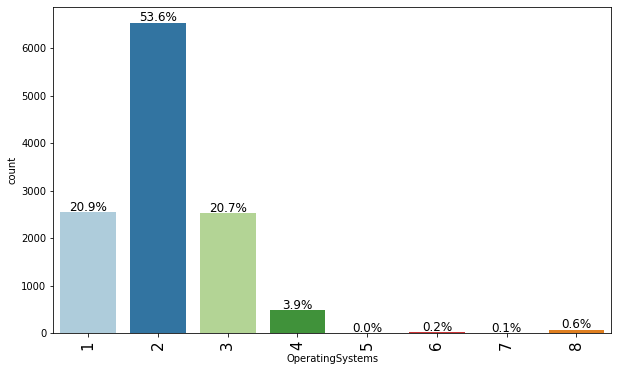

<IPython.core.display.Javascript object>

In [35]:
labeled_barplot(data, "OperatingSystems", perc=True)

* 53.6% of the customers use '2' operating system.

### Observations on Region

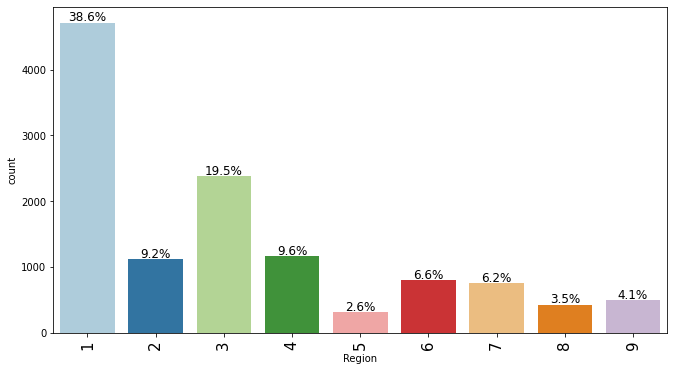

<IPython.core.display.Javascript object>

In [36]:
labeled_barplot(data, "Region", perc=True)

* 38.6% of the website sessions are from customers of Region 1.

### Observations on TrafficType

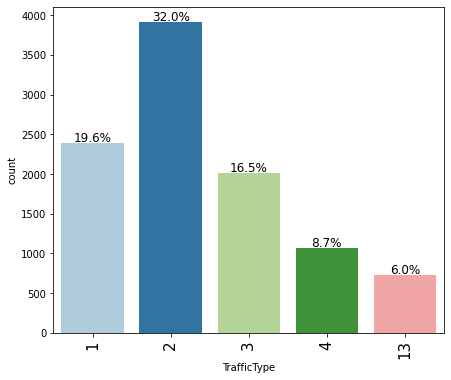

<IPython.core.display.Javascript object>

In [37]:
# limiting to only top 5 ocuurences
labeled_barplot(data, "TrafficType", perc=True, n=5)

* 32% of the traffic on website is of type 2.

### Observations on Weekend

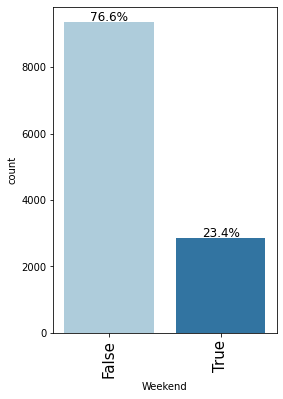

<IPython.core.display.Javascript object>

In [38]:
labeled_barplot(data, "Weekend", perc=True)

* 76.6% of the website sessions are on Non-weekend days.

### Observations on Revenue

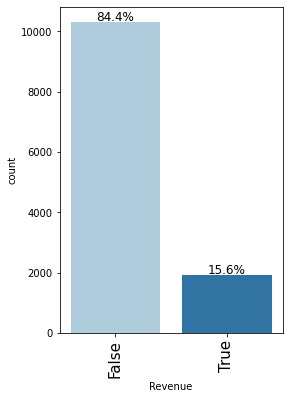

<IPython.core.display.Javascript object>

In [39]:
labeled_barplot(data, "Revenue", perc=True)

* Website is able to generate revenue from only 15.6% of the customers.

### Observations on Administrative

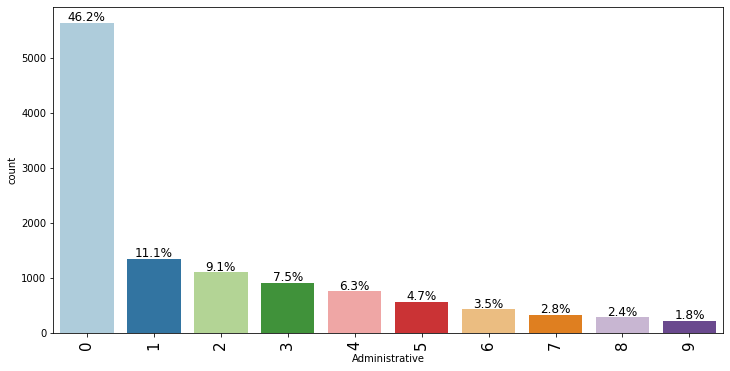

<IPython.core.display.Javascript object>

In [40]:
labeled_barplot(data, "Administrative", perc=True, n=10)

* 46.2% of the customers have not visited the administrative page.

### Observations on Informational

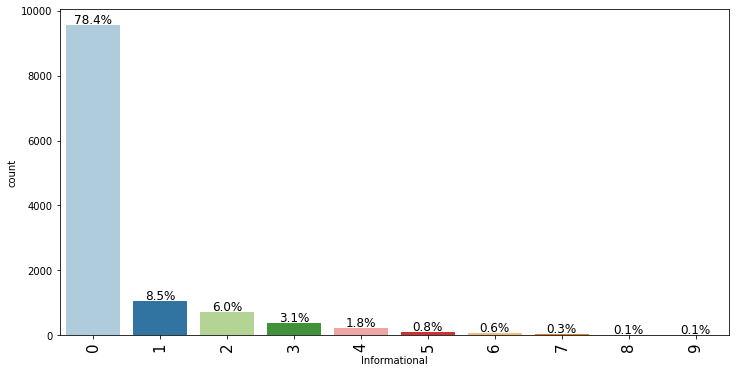

<IPython.core.display.Javascript object>

In [41]:
labeled_barplot(data, "Informational", perc=True, n=10)

* 78.4% of the customers have not visited the Informational page.

### Observations on ProductRelated

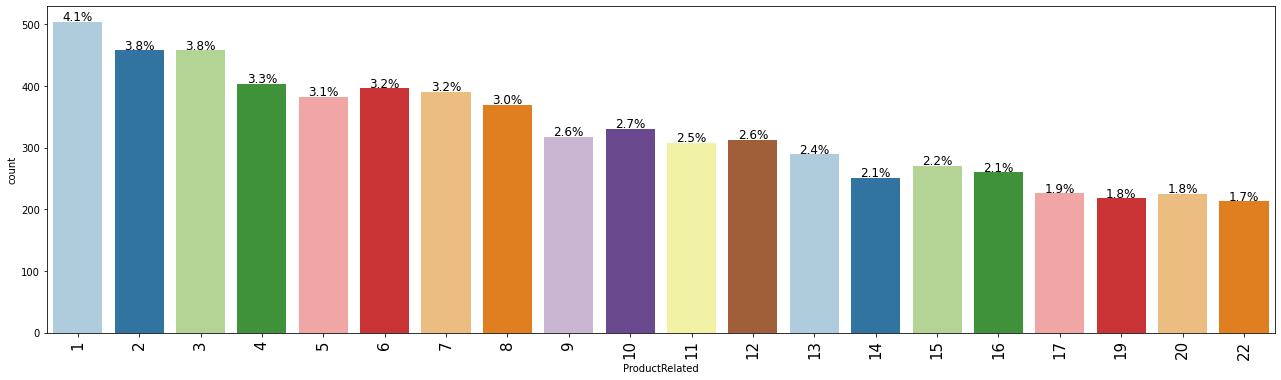

<IPython.core.display.Javascript object>

In [42]:
labeled_barplot(data, "ProductRelated", n=20, perc=True)

In [43]:
(len(data[data["ProductRelated"] == 0]["ProductRelated"]) / len(data)) * 100

0.311347808275297

<IPython.core.display.Javascript object>

* Only 0.3% of customers have not visited the product related pages.

## Bivariate Analysis

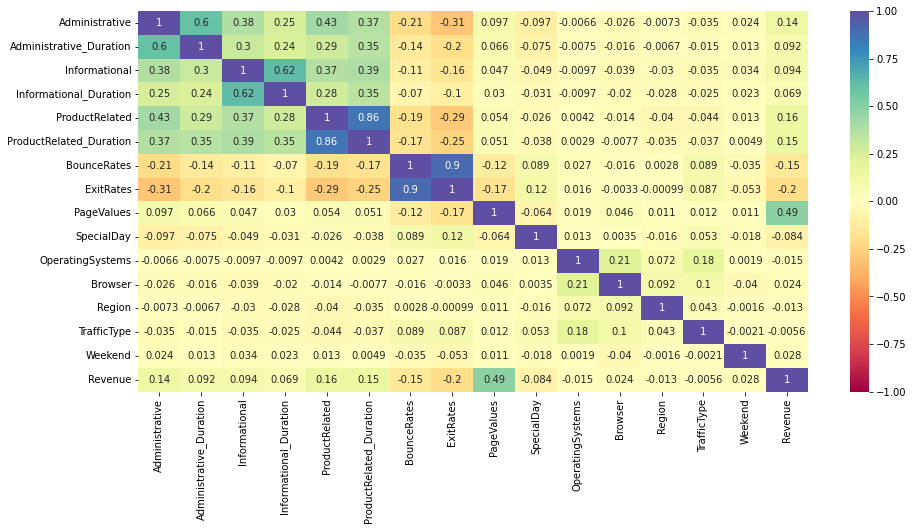

<IPython.core.display.Javascript object>

In [44]:
plt.figure(figsize=(15, 7))
sns.heatmap(data.corr(), annot=True, vmin=-1, vmax=1, cmap="Spectral")
plt.show()

* Revenue shows the highest correlation with PageValues (0.49) simply because PageValues takes in account the pages visited before reaching the 'transaction' page.
* Administrative, Informational and ProductRelated pages are correlated with the Administrative, Informational and ProductRelated time durations spent on them which is understandable.
* BounceRates and ExitRates are very highly correlated(0.9) with each other.

ValueError: object arrays are not supported

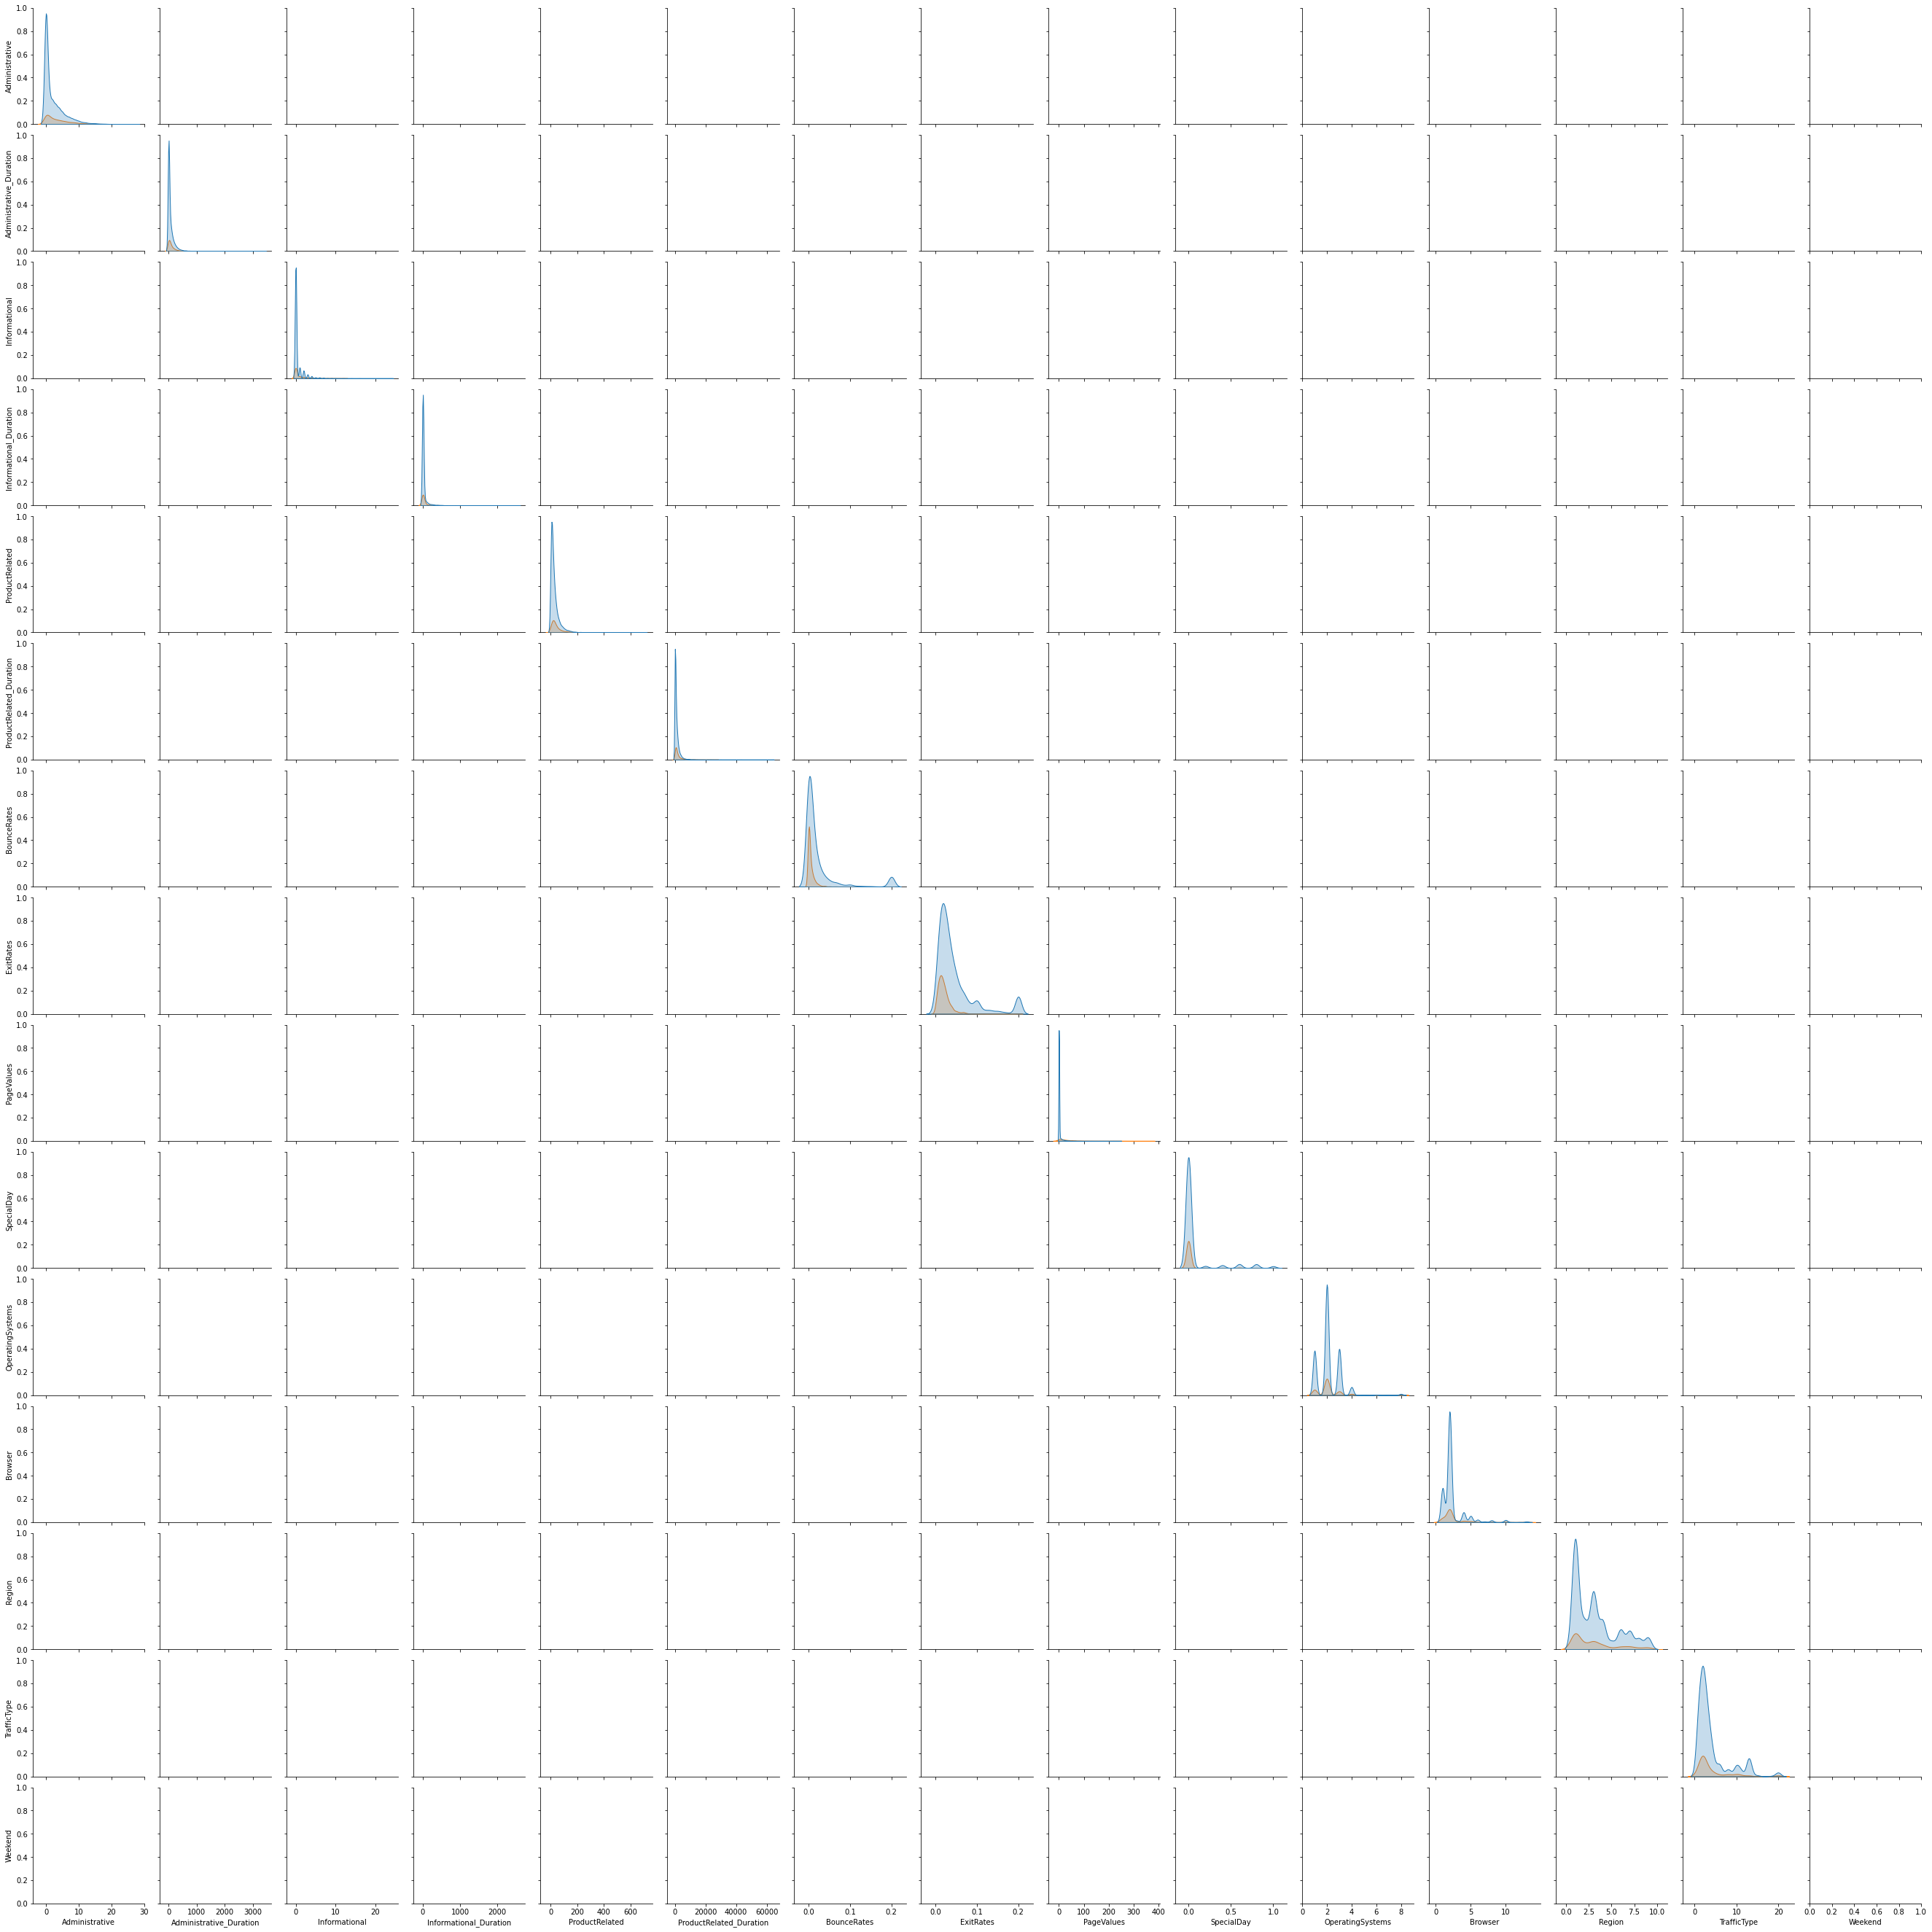

<IPython.core.display.Javascript object>

In [45]:
sns.pairplot(data=data, hue="Revenue")
plt.show()

* We can see varying distributions in variables for revenue, we should investigate it further.

### Revenue vs Administrative, Informational and ProductRelated pages and time spent on these pages

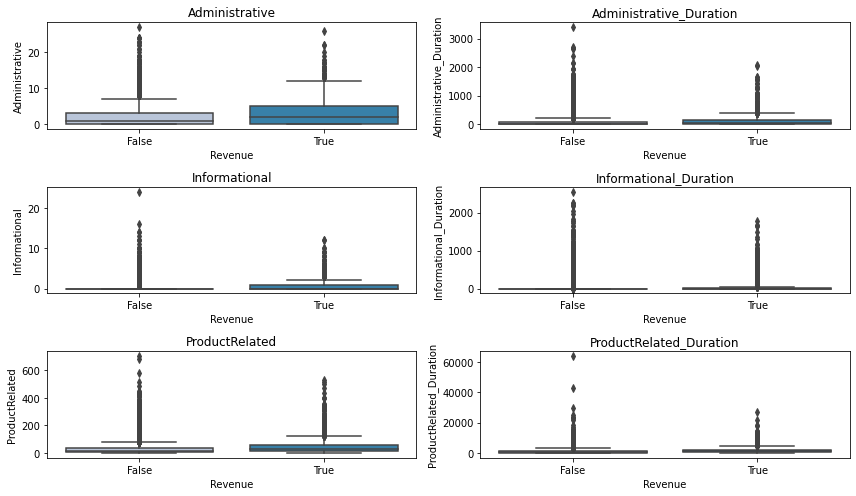

<IPython.core.display.Javascript object>

In [47]:
cols = data[
    [
        "Administrative",
        "Administrative_Duration",
        "Informational",
        "Informational_Duration",
        "ProductRelated",
        "ProductRelated_Duration",
    ]
].columns.tolist()
plt.figure(figsize=(12, 7))

for i, variable in enumerate(cols):
    plt.subplot(3, 2, i + 1)
    sns.boxplot(data["Revenue"], data[variable], palette="PuBu")
    plt.tight_layout()
    plt.title(variable)
plt.show()

**It is difficult to make an interpretation from the graphs above let's visualize them by removing these outliers (for visualization not from orignal data) to get a better understanding**

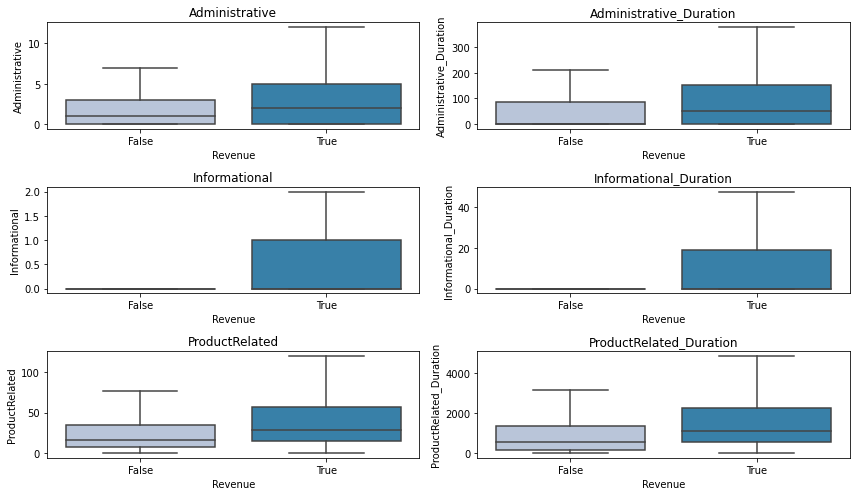

<IPython.core.display.Javascript object>

In [48]:
cols = data[
    [
        "Administrative",
        "Administrative_Duration",
        "Informational",
        "Informational_Duration",
        "ProductRelated",
        "ProductRelated_Duration",
    ]
].columns.tolist()
plt.figure(figsize=(12, 7))

for i, variable in enumerate(cols):
    plt.subplot(3, 2, i + 1)
    sns.boxplot(data["Revenue"], data[variable], palette="PuBu", showfliers=False)
    plt.tight_layout()
    plt.title(variable)
plt.show()

* Customers who have visited Administrative, Informational and ProductRelated pages more times contribute to the revenue as compared to the one's who visited less pages.
* Those customers who spend more time on the Administrative, Informational and ProductRelated pages help in generating the revenue.
* But in both cases - visiting the page and spending more time on pages have many outliers.
* There is clear distinction between the customers - visiting more pages and spending more time on pages contributes to the revenue.

### Revenue vs Bounce Rates,Exit Rates

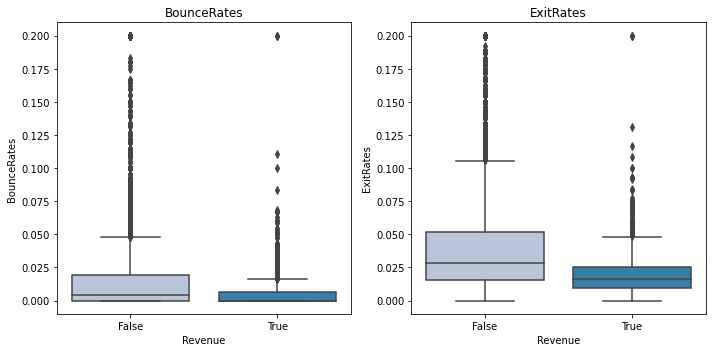

<IPython.core.display.Javascript object>

In [49]:
cols = data[['BounceRates','ExitRates']].columns.tolist()
plt.figure(figsize=(10,5))

for i, variable in enumerate(cols):
                     plt.subplot(1,2,i+1)
                     sns.boxplot(data["Revenue"],data[variable],palette="PuBu")
                     plt.tight_layout()
                     plt.title(variable)
plt.show()


* It is logical that customers who leave the website withouth triggering any response on server(definition of bounce rate) wouldn't be contributing to the revenue, similarly for the exit rates.

### Revenue vs PageValues

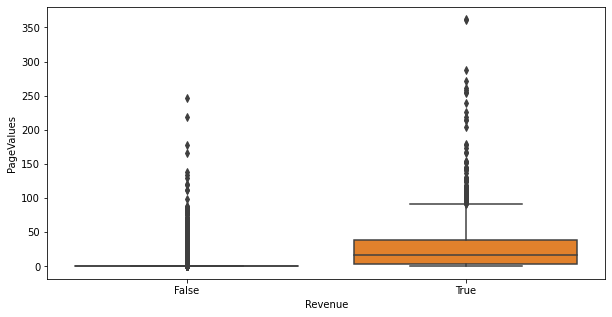

<IPython.core.display.Javascript object>

In [50]:
plt.figure(figsize=(10, 5))
sns.boxplot(data["Revenue"], data["PageValues"])
plt.show()

* Higher PageValues means higher contribution to revenue.

### Revenue vs SpecialDay

In [51]:
# function to plot stacked bar chart


def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 5, 6))
    plt.legend(
        loc="lower left", frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

<IPython.core.display.Javascript object>

Revenue     False  True    All
SpecialDay                    
All         10297  1908  12205
0.0          9125  1831  10956
0.6           321    29    350
0.2           164    14    178
0.4           230    13    243
0.8           313    11    324
1.0           144    10    154
------------------------------------------------------------------------------------------------------------------------


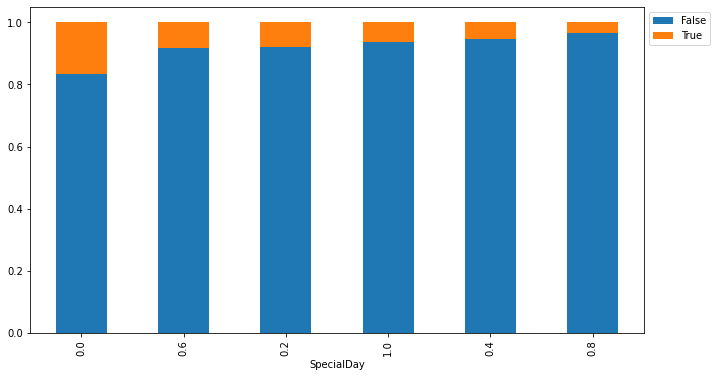

<IPython.core.display.Javascript object>

In [52]:
stacked_barplot(data, "SpecialDay", "Revenue")

* Regular days contribute more to the revenue instead of special occasions which is understandable as most days are non-special days, but there are very few conversion sessions on special days.

### Revenue vs Month

Revenue  False  True    All
Month                      
All      10297  1908  12205
Nov       2222   760   2982
May       2964   365   3329
Dec       1490   216   1706
Mar       1668   192   1860
Oct        434   115    549
Sep        362    86    448
Aug        357    76    433
Jul        366    66    432
June       256    29    285
Feb        178     3    181
------------------------------------------------------------------------------------------------------------------------


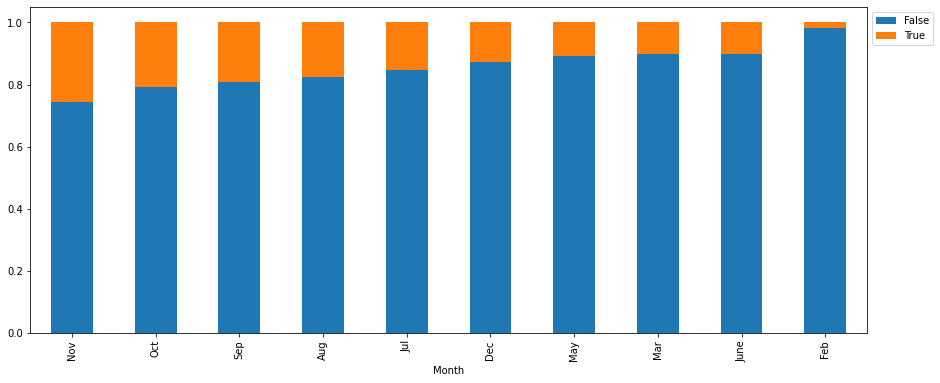

<IPython.core.display.Javascript object>

In [53]:
stacked_barplot(data, "Month", "Revenue")

* November and May are the months with largest contributions in the revenue.
* There are lesser sessions in November as compared to May but more conversions.

In [54]:
revenue_data = data[data["Revenue"] == True]
revenue_data.groupby(["Month", "SpecialDay"])["Revenue"].count()

Month  SpecialDay
Aug    0.0            76
Dec    0.0           216
Feb    0.0             1
       0.8             1
       1.0             1
Jul    0.0            66
June   0.0            29
Mar    0.0           192
May    0.0           290
       0.2            14
       0.4            13
       0.6            29
       0.8            10
       1.0             9
Nov    0.0           760
Oct    0.0           115
Sep    0.0            86
Name: Revenue, dtype: int64

<IPython.core.display.Javascript object>

* Revenue sessions on or around Special day were only observed in May, this means website is not able to capitalize on the special occasions.

### Revenue vs OperatingSystems

Revenue           False  True    All
OperatingSystems                    
All               10297  1908  12205
2                  5386  1155   6541
1                  2170   379   2549
3                  2262   268   2530
4                   393    85    478
8                    58    17     75
6                    17     2     19
5                     5     1      6
7                     6     1      7
------------------------------------------------------------------------------------------------------------------------


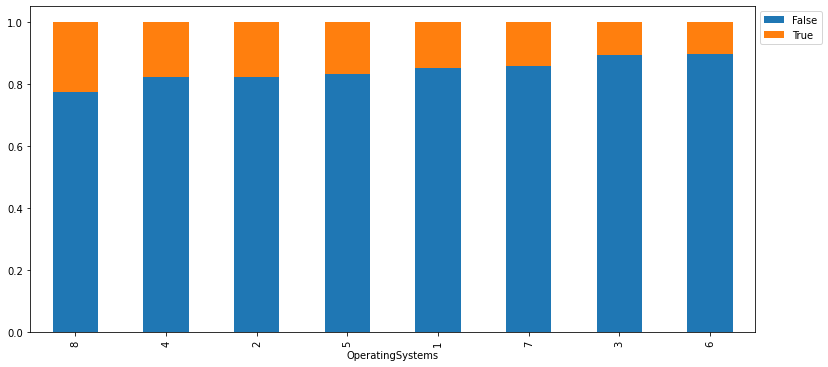

<IPython.core.display.Javascript object>

In [55]:
stacked_barplot(data, "OperatingSystems", "Revenue")

* Custoemrs using operating system '2' are the highest contributors to revenue, approximately 20% (1155).

### Revenue vs Browser

Revenue  False  True    All
Browser                    
All      10297  1908  12205
2         6660  1223   7883
1         2062   365   2427
4          601   130    731
5          379    86    465
10         131    32    163
8          114    21    135
6          154    20    174
13          40    16     56
7           43     6     49
3          100     5    105
12           7     3     10
11           5     1      6
9            1     0      1
------------------------------------------------------------------------------------------------------------------------


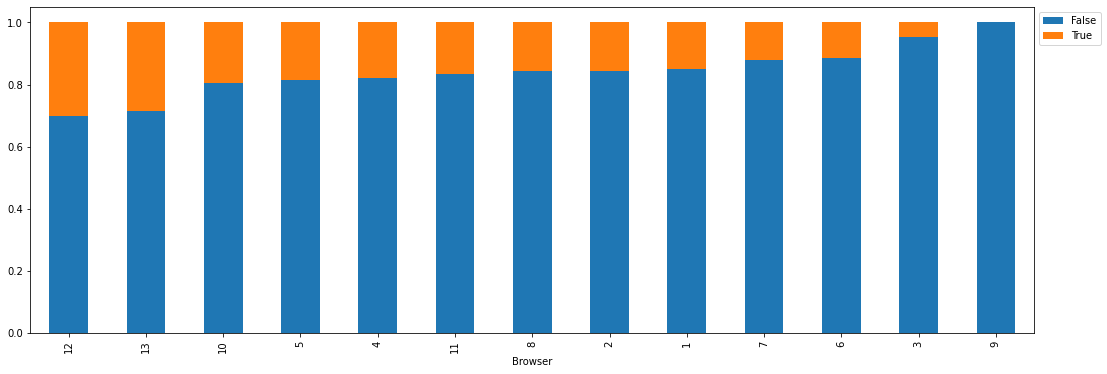

<IPython.core.display.Javascript object>

In [56]:
stacked_barplot(data, "Browser", "Revenue")

* Approximately 20%(1223 customers) of cutomers using Browser '2' contribute to the revenue.

### Revenue vs Region

Revenue  False  True    All
Region                     
All      10297  1908  12205
1         3943   771   4714
3         2030   349   2379
2          940   188   1128
4          996   175   1171
7          639   119    758
6          689   112    801
9          419    86    505
8          375    56    431
5          266    52    318
------------------------------------------------------------------------------------------------------------------------


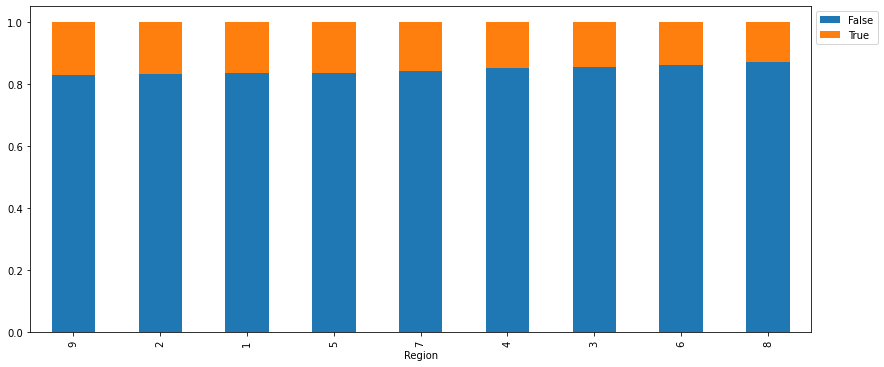

<IPython.core.display.Javascript object>

In [57]:
stacked_barplot(data, "Region", "Revenue")

* There is a similar distrbution in regions.

Revenue      False  True    All
TrafficType                    
All          10297  1908  12205
2             3064   847   3911
1             2126   262   2388
3             1833   180   2013
4              901   165   1066
8              248    95    343
10             360    90    450
5              204    56    260
6              390    53    443
20             143    50    193
11             200    47    247
13             685    43    728
7               28    12     40
9               37     4     41
14              11     2     13
16               2     1      3
19              16     1     17
12               1     0      1
15              37     0     37
17               1     0      1
18              10     0     10
------------------------------------------------------------------------------------------------------------------------


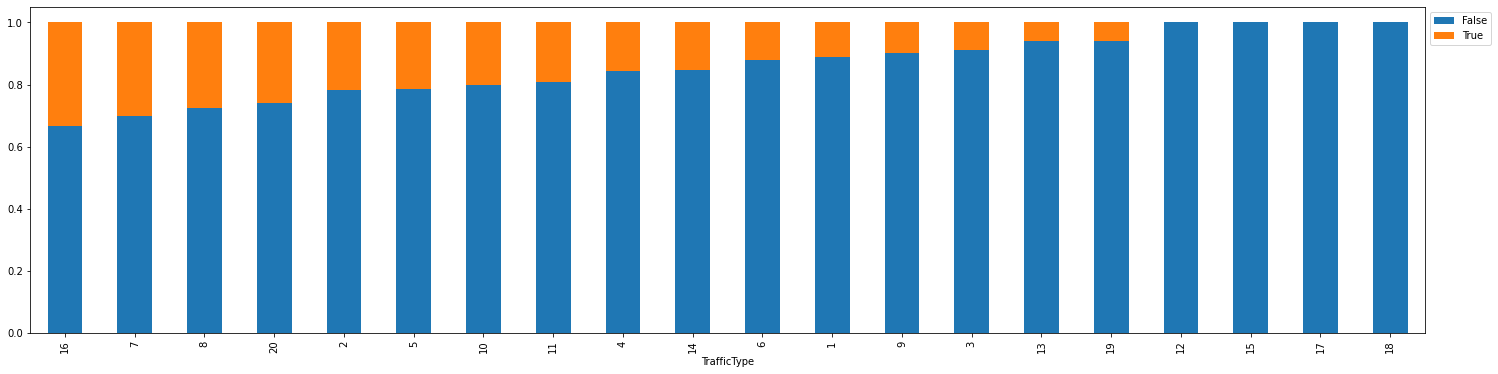

<IPython.core.display.Javascript object>

In [58]:
stacked_barplot(data, "TrafficType", "Revenue")

* There is a varying pattern of revenue sessions among different traffic sources, although traffic coming source 2 has the highest proportion of revenue sessions.

### Revenue vs VisitorType

Revenue            False  True    All
VisitorType                          
All                10297  1908  12205
Returning_Visitor   8961  1470  10431
New_Visitor         1271   422   1693
Other                 65    16     81
------------------------------------------------------------------------------------------------------------------------


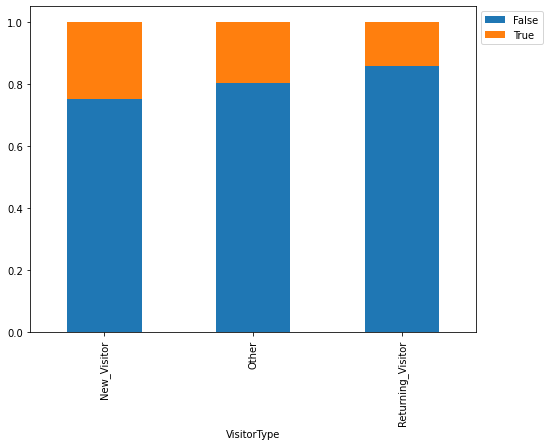

<IPython.core.display.Javascript object>

In [59]:
stacked_barplot(data, "VisitorType", "Revenue")

* Returning customers are the largest contributors to the revenue but interestingly New visitors end up having more conversion sessions.

### Revenue vs Weekend

Revenue  False  True    All
Weekend                    
All      10297  1908  12205
False     7937  1409   9346
True      2360   499   2859
------------------------------------------------------------------------------------------------------------------------


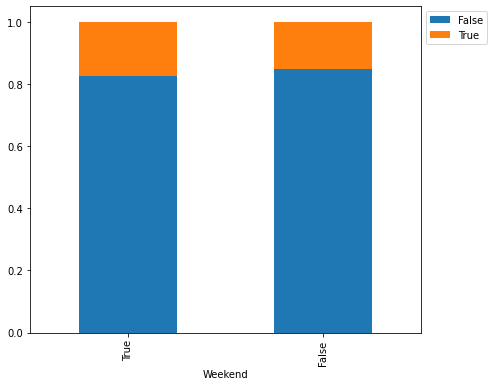

<IPython.core.display.Javascript object>

In [60]:
stacked_barplot(data, "Weekend", "Revenue")

* There is not much difference in weekend and week-day sessions.

### Customer-Level Analysis

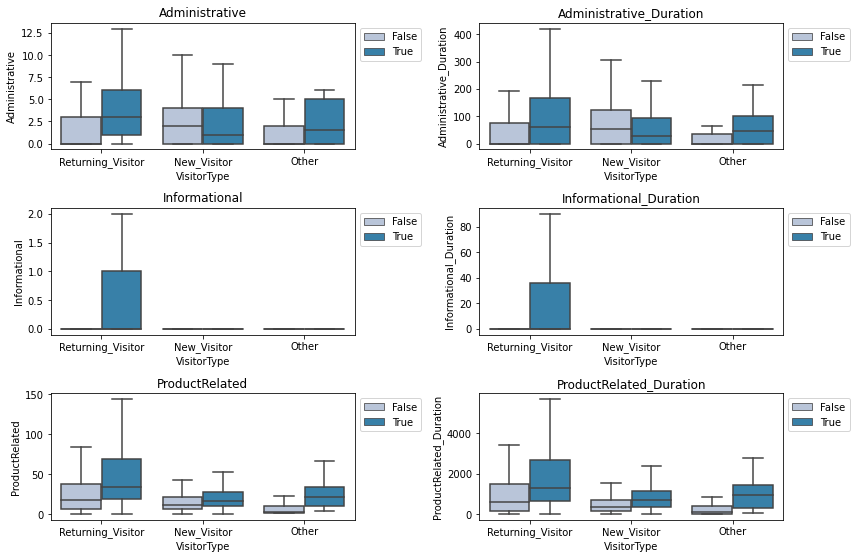

<IPython.core.display.Javascript object>

In [61]:
cols = data[
    [
        "Administrative",
        "Administrative_Duration",
        "Informational",
        "Informational_Duration",
        "ProductRelated",
        "ProductRelated_Duration",
    ]
].columns.tolist()
plt.figure(figsize=(12, 10))

for i, variable in enumerate(cols):
    plt.subplot(4, 2, i + 1)
    sns.boxplot(
        data["VisitorType"],
        data[variable],
        hue=data["Revenue"],
        palette="PuBu",
        showfliers=False,  # turning-off outliers
    )
    plt.tight_layout()
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.title(variable)
plt.show()

* New visitors who have visited more administrative pages and spent more time on them have not contributed to the revenue - This indicates that the administrative pages need to be user friendly and simplified.
* Returning customers visiting informational pages have contributed to revenue - The informational pages are doing well to provide customers with all the required information.
* ProductRelated pages are doing a fair job.

VisitorType  New_Visitor  Other  Returning_Visitor    All
Month                                                    
All                 1693     81              10431  12205
Dec                  334     58               1314   1706
Nov                  419     22               2541   2982
June                  30      1                254    285
Aug                   72      0                361    433
Feb                    1      0                180    181
Jul                   54      0                378    432
Mar                  232      0               1628   1860
May                  319      0               3010   3329
Oct                  124      0                425    549
Sep                  108      0                340    448
------------------------------------------------------------------------------------------------------------------------


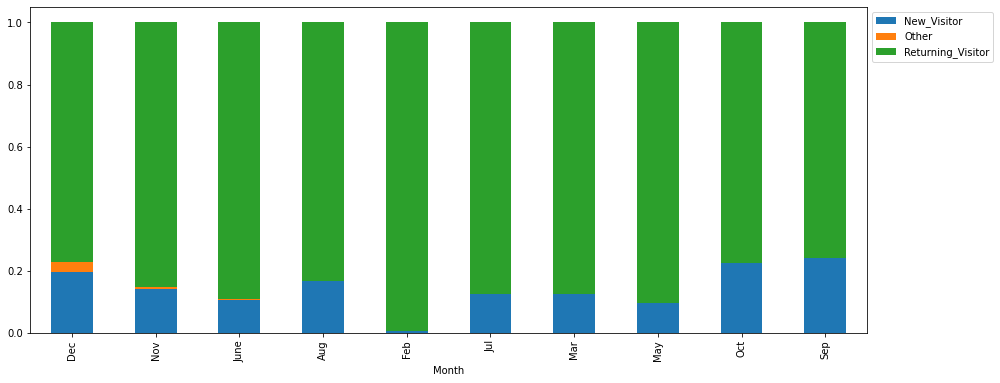

<IPython.core.display.Javascript object>

In [62]:
stacked_barplot(data, "Month", "VisitorType")

* November and December saw most new customers, but the proportion of new customers to returning customers is highest in October and September.

### <a id='link1'>Summary of EDA</a>
**Data Description:**

- There are 125 duplicate values in the dataset, which were dropped.
- There are no missing values in the data.
- Most of the data-types are either **int64** or **float64**.
- 2 columns - Month and VisitorType are having data-types as an **object**, this means we need to convert these into suitable data-type before we feed our data into the model.
- The two columns: "Weekend" and "Revenue", are of **bool** data-type.


**Observations from EDA:**

* `Administrative` and `Administrative_Duration`: 46.2% of the customers have not visited the administrative page. From the boxplot of Administrative_Duration we can see that the third quartile(Q3) is equal to 94 which means 75% of customers stay less than 94 seconds on Administrative pages in a session.

* `Informational` and `Informational_Duration`: * 78.4% of the customers have not visited the Informational page. On average customers have spent 35 seconds on the informational page.

* `ProductRelated`and `ProductRelated_Duration`: Only 0.3% of customers have not visited the product related pages. From the boxplot pf ProductRelated we can see that the third quartile(Q3) is equal to 38 which means 75% of customers have visited less than 38 pages and on average a customer visits 32 pages. On average customers have spent 1206 seconds (~20 minutes) on the ProductRelated page which is way more than the administrative page and informational page.

* `PageValues`: On average the customers visit 6 pages before finally landing on the transaction page. Higher PageValue contributes to more revenue.

*  `Month`: 27.3% of the users visited the website in the month of May followed by November with 24.4% of traffic. November and May are the months with largest contributions in the revenue. There are lesser sessions in November as compared to May but more conversions.

* `VisitorType`: 85.5% of the customer are returning customers, indicating the website has a loyal base of customers. During these 10 months website also saw 13.9% of the customers visiting the website. Returning customers are the largest contributors to the revenue but interestingly New visitors end up having more conversion sessions.

* `SpecialDay`: Regular days contribute more to the revenue instead of special occasions which is understandable as most days are non-special days, but there are very few conversion sessions on special days. Revenue sessions on or around Special day were only observed in May, this means website is not able to capitalize on the special occasions.

* `Revenue vs Different Pages`:
    * Customers who have visited Administrative, Informational and ProductRelated pages more times contribute to the revenue as compared to the one's who visited less pages.
    * Those customers who spend more time on the Administrative, Informational and ProductRelated pages help in generating the revenue.
    * There is clear distinction between the customers - visiting more pages and spending more time on pages contributes to the revenue.

* Customers leaving the website without triggering any response on server(definition of bounce rate) wouldn't be contributing to the revenue, which makes sense.

* Customer-Level Analysis
* New visitors who have visited more administrative pages and spent more time on them have not contributed to the revenue - This indicates that the administrative pages need to be user friendly and simplified.
* Returning customers visiting informational pages have contributed to revenue - The informational pages are doing well to provide customers with all the required information.
* ProductRelated pages are doing a fair job.
* November and December saw most new customers, but the proportion of new customers to returning customers is highest in October and September.


### Actions for data preparation:

* PageValues column has information related to the transaction activity of a customer and would create a bias in model if used in prediction. So, we will drop it.

### Data Preparation

In [63]:
# dropping PageValues
data = data.drop(["PageValues"], axis=1)

<IPython.core.display.Javascript object>

In [64]:
# creating dummy varibles
dummy_data = pd.get_dummies(
    data,
    columns=[
        "Month",
        "VisitorType",
        "Weekend",
        "Region",
        "Browser",
        "OperatingSystems",
        "SpecialDay",
    ],
    drop_first=True,
)
dummy_data.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,TrafficType,Revenue,Month_Dec,Month_Feb,Month_Jul,Month_June,Month_Mar,Month_May,Month_Nov,Month_Oct,Month_Sep,VisitorType_Other,VisitorType_Returning_Visitor,Weekend_True,Region_2,Region_3,Region_4,Region_5,Region_6,Region_7,Region_8,Region_9,Browser_2,Browser_3,Browser_4,Browser_5,Browser_6,Browser_7,Browser_8,Browser_9,Browser_10,Browser_11,Browser_12,Browser_13,OperatingSystems_2,OperatingSystems_3,OperatingSystems_4,OperatingSystems_5,OperatingSystems_6,OperatingSystems_7,OperatingSystems_8,SpecialDay_0.2,SpecialDay_0.4,SpecialDay_0.6,SpecialDay_0.8,SpecialDay_1.0
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,1,False,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,2,False,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,3,False,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,4,False,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,4,False,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0


<IPython.core.display.Javascript object>

## Split Data

In [63]:
X = dummy_data.drop("Revenue", axis=1)  # Features
y = dummy_data["Revenue"].astype("int64")  # Labels (Target Variable)
# converting target to integers - since some functions might not work with bool type

<IPython.core.display.Javascript object>

In [64]:
# Splitting data into training and test set:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)
print(X_train.shape, X_test.shape)

(8543, 53) (3662, 53)


<IPython.core.display.Javascript object>

In [65]:
print("Number of rows in train data =", X_train.shape[0])
print("Number of rows in test data =", X_test.shape[0])

Number of rows in train data = 8543
Number of rows in test data = 3662


<IPython.core.display.Javascript object>

In [66]:
print("Percentage of classes in training set:")
print(y_train.value_counts(normalize=True))
print("Percentage of classes in test set:")
print(y_test.value_counts(normalize=True))

Percentage of classes in training set:
0    0.845488
1    0.154512
Name: Revenue, dtype: float64
Percentage of classes in test set:
0    0.839432
1    0.160568
Name: Revenue, dtype: float64


<IPython.core.display.Javascript object>

### Model evaluation criterion

### Model can make wrong predictions as:

1. Predicting a customer will contribute to the revenue but in reality the customer would not have contribute to the revenue. - Loss of resources

2. Predicting a customer will not contribute to revenue but in reality the customer would have contributed to revenue. - Loss of opportunity

### Which case is more important? 

* If we predict a customer who was going to contribute to the revenue as a customer who will not contribute to the revenue.

### How to reduce this loss i.e need to reduce False Negatives?
*  `recall` should be maximized, the greater the recall higher the chances of minimizing the false negatives.

#### First, let's create functions to calculate different metrics and confusion matrix so that we don't have to use the same code repeatedly for each model.
* The get_recall_score function will be used to check the model performance of models. 
* The make_confusion_matrix function will be used to plot confusion matrix.

In [67]:
##  Function to calculate recall score
def get_recall_score(model, predictors, target):
    """
    model: classifier
    predictors: independent variables
    target: dependent variable
    
    """
    prediction = model.predict(predictors)
    return recall_score(target, prediction)

<IPython.core.display.Javascript object>

In [68]:
def confusion_matrix_sklearn(model, predictors, target):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    y_pred = model.predict(predictors)
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

<IPython.core.display.Javascript object>

## Build Decision Tree Model

* We will build our model using the DecisionTreeClassifier function. Using default 'gini' criteria to split. 
* If the frequency of class A is 10% and the frequency of class B is 90%, then class B will become the dominant class and the decision tree will become biased toward the dominant classes.

* In this case, we can pass a dictionary {0:0.15,1:0.85} to the model to specify the weight of each class and the decision tree will give more weightage to class 1.

* class_weight is a hyperparameter for the decision tree classifier.

In [69]:
model = DecisionTreeClassifier(
    criterion="gini", class_weight={0: 0.15, 1: 0.85}, random_state=1
)

<IPython.core.display.Javascript object>

In [70]:
model.fit(X_train, y_train)

DecisionTreeClassifier(class_weight={0: 0.15, 1: 0.85}, random_state=1)

<IPython.core.display.Javascript object>

#### Checking model performance on training set

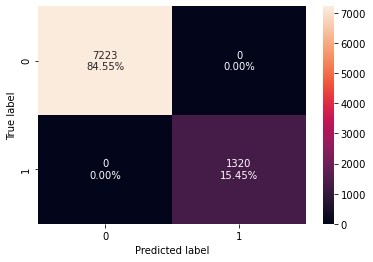

<IPython.core.display.Javascript object>

In [71]:
confusion_matrix_sklearn(model, X_train, y_train)

In [72]:
decision_tree_perf_train = get_recall_score(model, X_train, y_train)

print("Recall Score:", decision_tree_perf_train)

Recall Score: 1.0


<IPython.core.display.Javascript object>

* Model is able to perfectly classify all the data points on the training set.
* 0 errors on the training set, each sample has been classified correctly.
* As we know a decision tree will continue to grow and classify each data point correctly if no restrictions are applied as the trees will learn all the patterns in the training set.
* This generally leads to overfitting of the model as Decision Tree will perform well on the training set but will fail to replicate the performance on the test set.

#### Checking model performance on test set

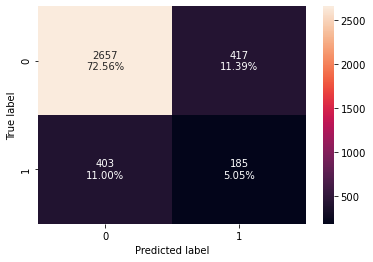

<IPython.core.display.Javascript object>

In [73]:
confusion_matrix_sklearn(model, X_test, y_test)

In [74]:
decision_tree_perf_test = get_recall_score(model, X_test, y_test)
print("Recall Score:", decision_tree_perf_test)

Recall Score: 0.31462585034013607


<IPython.core.display.Javascript object>

* There is a huge disparity in performance of model on training set and test set, which suggests that the model is overfiiting.

## Visualizing the Decision Tree

In [75]:
## creating a list of column names
feature_names = X_train.columns.to_list()

<IPython.core.display.Javascript object>

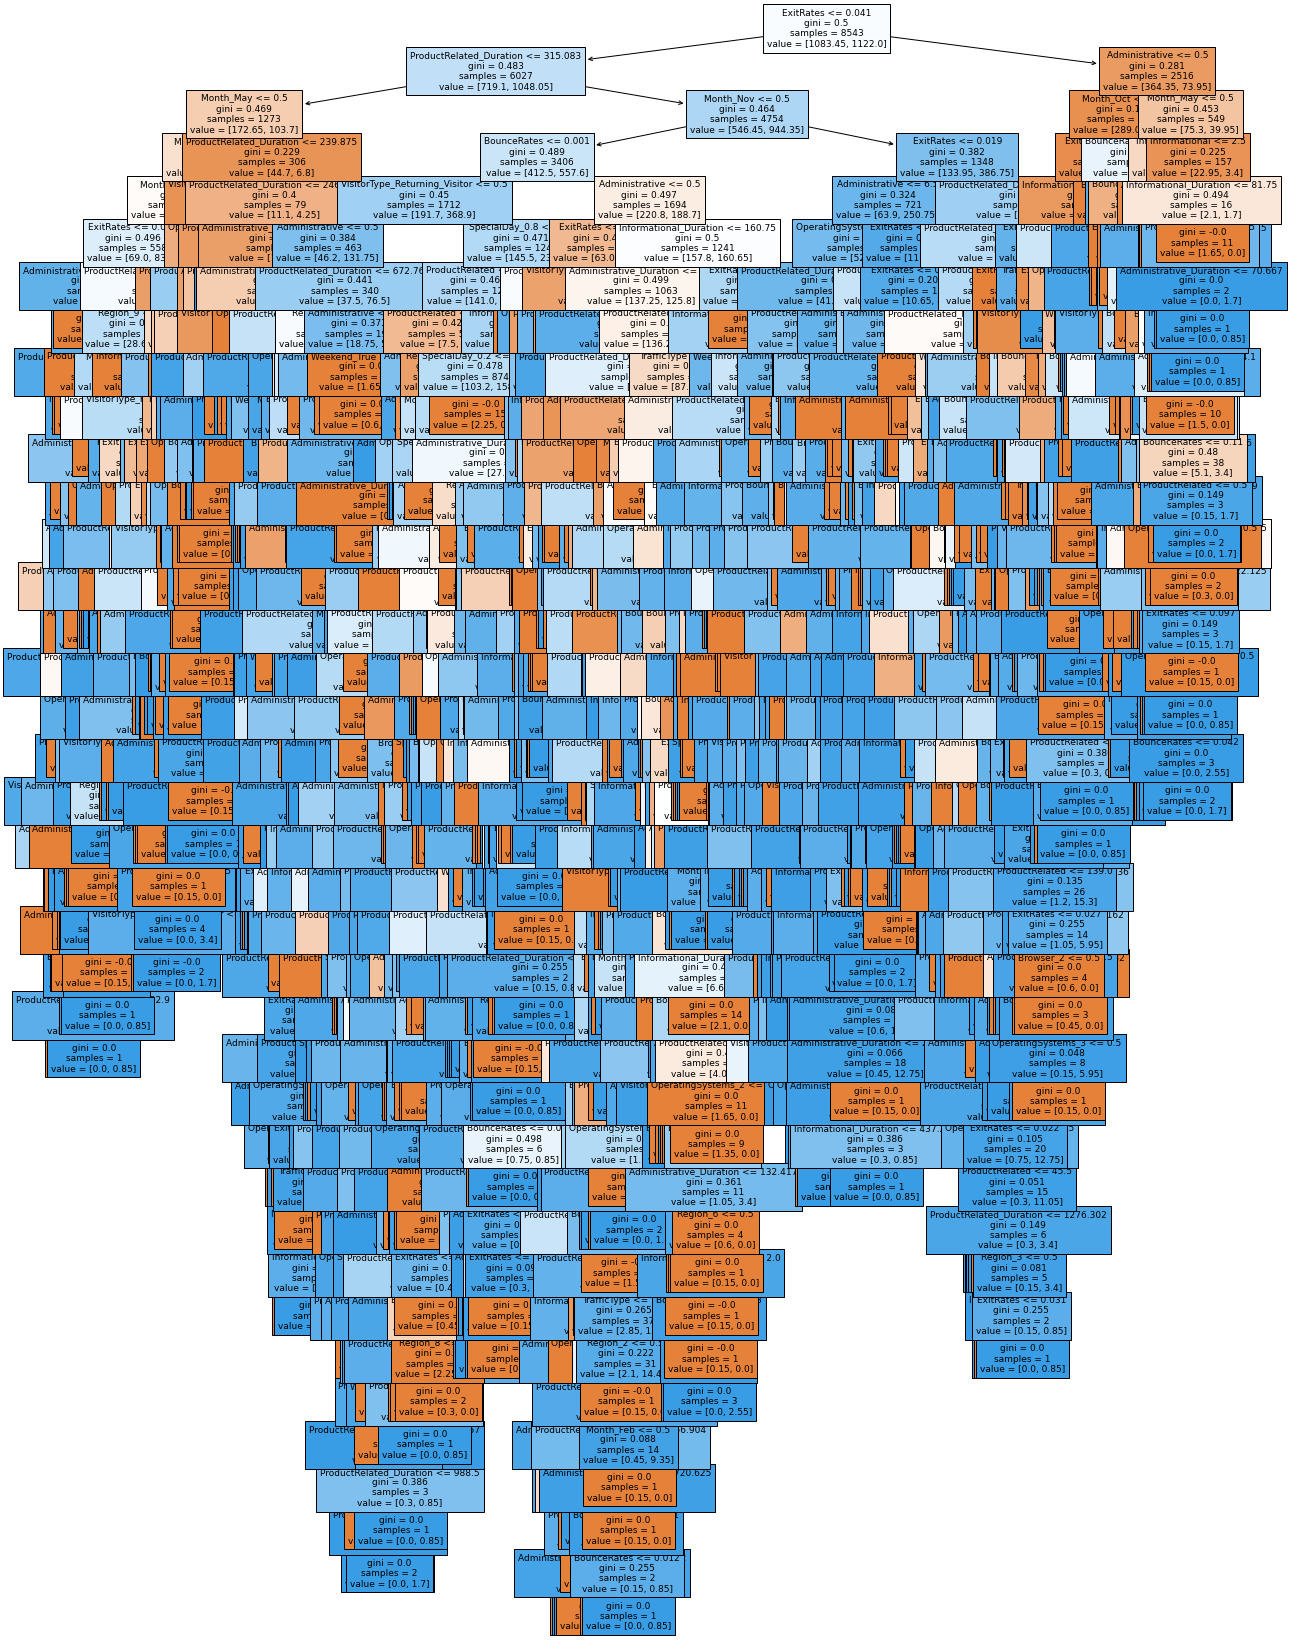

<IPython.core.display.Javascript object>

In [76]:
plt.figure(figsize=(20, 30))
out = tree.plot_tree(
    model,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=False,
    class_names=None,
)
# below code will add arrows to the decision tree split if they are missing
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")
        arrow.set_linewidth(1)
plt.show()

In [77]:
# Text report showing the rules of a decision tree -

print(tree.export_text(model, feature_names=feature_names, show_weights=True))

|--- ExitRates <= 0.04
|   |--- ProductRelated_Duration <= 315.08
|   |   |--- Month_May <= 0.50
|   |   |   |--- Month_Mar <= 0.50
|   |   |   |   |--- Month_Dec <= 0.50
|   |   |   |   |   |--- ExitRates <= 0.00
|   |   |   |   |   |   |--- Administrative_Duration <= 66.90
|   |   |   |   |   |   |   |--- Browser_4 <= 0.50
|   |   |   |   |   |   |   |   |--- ProductRelated_Duration <= 11.80
|   |   |   |   |   |   |   |   |   |--- weights: [0.15, 0.00] class: 0
|   |   |   |   |   |   |   |   |--- ProductRelated_Duration >  11.80
|   |   |   |   |   |   |   |   |   |--- Informational <= 0.50
|   |   |   |   |   |   |   |   |   |   |--- Month_June <= 0.50
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 11
|   |   |   |   |   |   |   |   |   |   |--- Month_June >  0.50
|   |   |   |   |   |   |   |   |   |   |   |--- weights: [0.15, 0.00] class: 0
|   |   |   |   |   |   |   |   |   |--- Informational >  0.50
|   |   |   |   |   |   |   |   |   |   |--- weig

<IPython.core.display.Javascript object>

* The tree above is very complex and difficult to interpret.

In [78]:
# importance of features in the tree building ( The importance of a feature is computed as the
# (normalized) total reduction of the criterion brought by that feature. It is also known as the Gini importance )

print(
    pd.DataFrame(
        model.feature_importances_, columns=["Imp"], index=X_train.columns
    ).sort_values(by="Imp", ascending=False)
)

                                        Imp
ExitRates                      2.416569e-01
ProductRelated_Duration        1.465191e-01
ProductRelated                 9.449226e-02
BounceRates                    7.290181e-02
Administrative_Duration        6.835291e-02
Administrative                 5.613283e-02
TrafficType                    4.425661e-02
Informational_Duration         2.540896e-02
Month_Nov                      2.122725e-02
Informational                  1.903085e-02
Month_Mar                      1.606716e-02
OperatingSystems_3             1.504970e-02
Weekend_True                   1.461695e-02
Month_May                      1.332757e-02
VisitorType_Returning_Visitor  1.262687e-02
Region_3                       1.121948e-02
Month_Dec                      1.003689e-02
Browser_4                      9.214118e-03
OperatingSystems_2             9.191157e-03
Region_4                       8.810003e-03
Month_Oct                      7.483384e-03
Region_6                       7

<IPython.core.display.Javascript object>

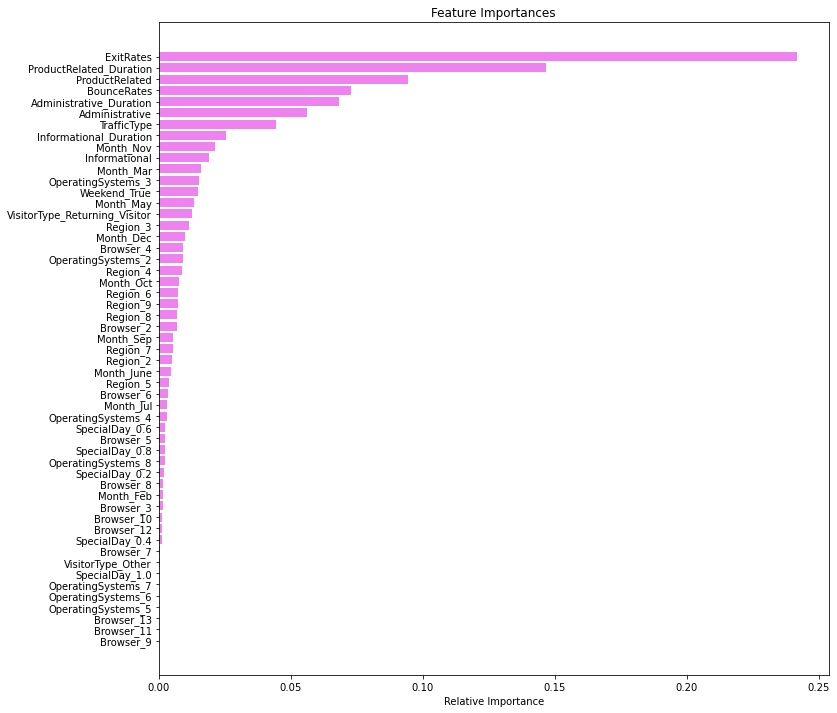

<IPython.core.display.Javascript object>

In [79]:
importances = model.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

* According to the decision tree model, ExitRates is the most important variable for predicting the Revenue.

### Reducing over fitting

#### Using GridSearch for Hyperparameter tuning of our tree model

* Hyperparameter tuning is also tricky in the sense that there is no direct way to calculate how a change in the
  hyperparameter value will reduce the loss of your model, so we usually resort to experimentation. i.e we'll use Grid search
* Grid search is a tuning technique that attempts to compute the optimum values of hyperparameters. 
* It is an exhaustive search that is performed on a the specific parameter values of a model.
* The parameters of the estimator/model used to apply these methods are optimized by cross-validated grid-search over a parameter grid.

In [80]:
# Choose the type of classifier.
estimator = DecisionTreeClassifier(random_state=1, class_weight={0: 0.15, 1: 0.85})

# Grid of parameters to choose from
parameters = {
    "max_depth": [5, 10, 15, None],
    "criterion": ["entropy", "gini"],
    "splitter": ["best", "random"],
    "min_impurity_decrease": [0.00001, 0.0001, 0.01],
}

# Type of scoring used to compare parameter combinations
scorer = make_scorer(recall_score)

# Run the grid search
grid_obj = GridSearchCV(estimator, parameters, scoring=scorer, cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
estimator = grid_obj.best_estimator_

# Fit the best algorithm to the data.
estimator.fit(X_train, y_train)

DecisionTreeClassifier(class_weight={0: 0.15, 1: 0.85}, max_depth=5,
                       min_impurity_decrease=1e-05, random_state=1)

<IPython.core.display.Javascript object>

#### Checking performance on training set

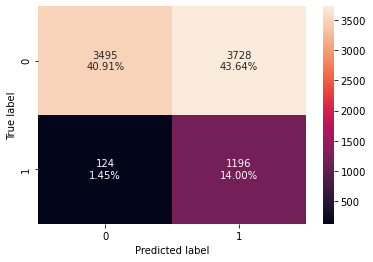

<IPython.core.display.Javascript object>

In [81]:
confusion_matrix_sklearn(estimator, X_train, y_train)

In [82]:
decision_tree_tune_perf_train = get_recall_score(estimator, X_train, y_train)
print("Recall Score:", decision_tree_tune_perf_train)

Recall Score: 0.906060606060606


<IPython.core.display.Javascript object>

#### Checking performance on test set

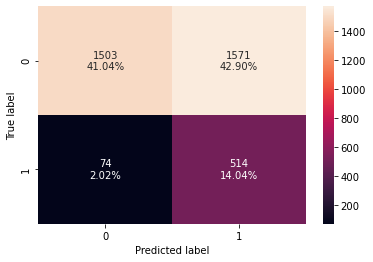

<IPython.core.display.Javascript object>

In [83]:
confusion_matrix_sklearn(estimator, X_test, y_test)

In [84]:
decision_tree_tune_perf_test = get_recall_score(estimator, X_test, y_test)
print("Recall Score:", decision_tree_tune_perf_test)

Recall Score: 0.8741496598639455


<IPython.core.display.Javascript object>

* The model is giving a generalized result now.

## Visualizing the Decision Tree

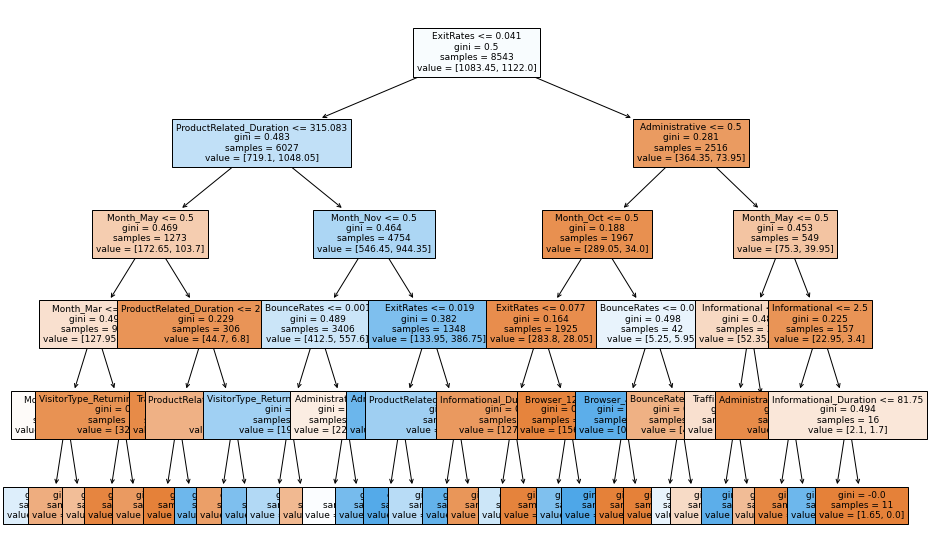

<IPython.core.display.Javascript object>

In [85]:
plt.figure(figsize=(15, 10))
out = tree.plot_tree(
    estimator,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=False,
    class_names=None,
)
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")
        arrow.set_linewidth(1)
plt.show()

In [86]:
# Text report showing the rules of a decision tree -

print(tree.export_text(estimator, feature_names=feature_names, show_weights=True))

|--- ExitRates <= 0.04
|   |--- ProductRelated_Duration <= 315.08
|   |   |--- Month_May <= 0.50
|   |   |   |--- Month_Mar <= 0.50
|   |   |   |   |--- Month_Dec <= 0.50
|   |   |   |   |   |--- weights: [69.00, 83.30] class: 1
|   |   |   |   |--- Month_Dec >  0.50
|   |   |   |   |   |--- weights: [26.55, 9.35] class: 0
|   |   |   |--- Month_Mar >  0.50
|   |   |   |   |--- VisitorType_Returning_Visitor <= 0.50
|   |   |   |   |   |--- weights: [7.05, 3.40] class: 0
|   |   |   |   |--- VisitorType_Returning_Visitor >  0.50
|   |   |   |   |   |--- weights: [25.35, 0.85] class: 0
|   |   |--- Month_May >  0.50
|   |   |   |--- ProductRelated_Duration <= 239.88
|   |   |   |   |--- TrafficType <= 2.50
|   |   |   |   |   |--- weights: [12.75, 2.55] class: 0
|   |   |   |   |--- TrafficType >  2.50
|   |   |   |   |   |--- weights: [20.85, 0.00] class: 0
|   |   |   |--- ProductRelated_Duration >  239.88
|   |   |   |   |--- ProductRelated_Duration <= 246.71
|   |   |   |   |   |--- 

<IPython.core.display.Javascript object>

**Observations from the tree:**

Using the above extracted decision rules we can make interpretations from the decision tree model like:

* If a customer lands on a page with exit rate less than 0.04 and spends less than 315 seconds on the product related page and the month is not May, March or December then the customer will be contributing to the revenue. But if the month is December then the customer will not contribute to the revenue.

`Interpretations from other decision rules can be made similarly`

In [87]:
# importance of features in the tree building ( The importance of a feature is computed as the
# (normalized) total reduction of the 'criterion' brought by that feature. It is also known as the Gini importance )

print(
    pd.DataFrame(
        estimator.feature_importances_, columns=["Imp"], index=X_train.columns
    ).sort_values(by="Imp", ascending=False)
)

# Here we will see that importance of features has increased

                                    Imp
ExitRates                      0.494656
ProductRelated_Duration        0.135669
BounceRates                    0.077837
Month_Nov                      0.070455
Administrative                 0.063077
Month_May                      0.039517
Month_Mar                      0.032021
VisitorType_Returning_Visitor  0.017749
Month_Dec                      0.017576
Month_Oct                      0.015519
Informational_Duration         0.014055
Informational                  0.008603
TrafficType                    0.005835
Browser_12                     0.004399
Browser_4                      0.001700
Administrative_Duration        0.001332
SpecialDay_0.6                 0.000000
OperatingSystems_3             0.000000
Browser_9                      0.000000
Browser_10                     0.000000
Browser_11                     0.000000
Browser_13                     0.000000
OperatingSystems_2             0.000000
OperatingSystems_5             0.000000


<IPython.core.display.Javascript object>

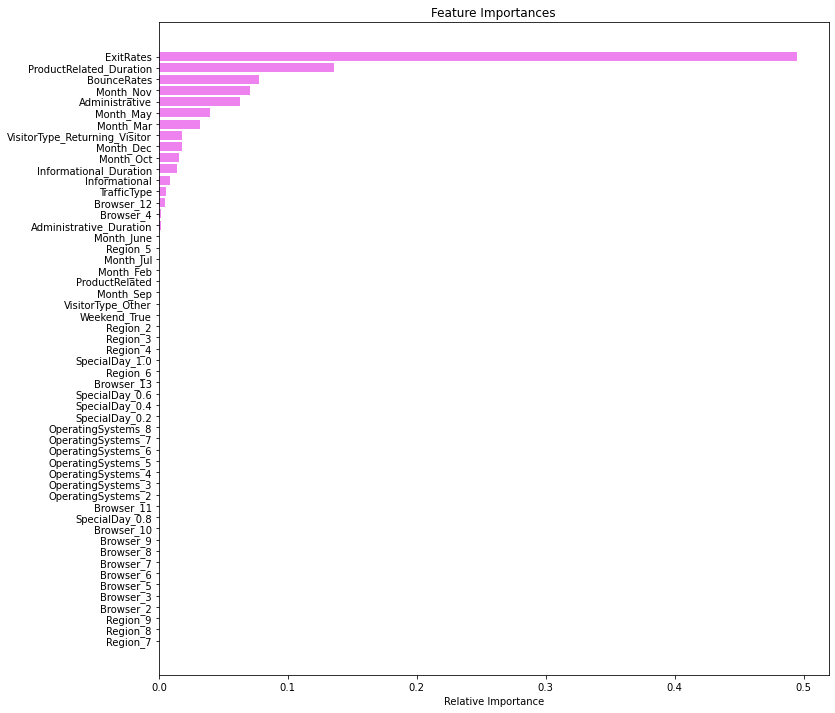

<IPython.core.display.Javascript object>

In [88]:
importances = estimator.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

* In tuned decision tree ExitRates is the most important feature followed by ProductRelated_Duration.

## Cost Complexity Pruning


The `DecisionTreeClassifier` provides parameters such as
``min_samples_leaf`` and ``max_depth`` to prevent a tree from overfiting. Cost
complexity pruning provides another option to control the size of a tree. In
`DecisionTreeClassifier`, this pruning technique is parameterized by the
cost complexity parameter, ``ccp_alpha``. Greater values of ``ccp_alpha``
increase the number of nodes pruned. Here we only show the effect of
``ccp_alpha`` on regularizing the trees and how to choose a ``ccp_alpha``
based on validation scores.

Total impurity of leaves vs effective alphas of pruned tree
---------------------------------------------------------------
Minimal cost complexity pruning recursively finds the node with the "weakest
link". The weakest link is characterized by an effective alpha, where the
nodes with the smallest effective alpha are pruned first. To get an idea of
what values of ``ccp_alpha`` could be appropriate, scikit-learn provides
`DecisionTreeClassifier.cost_complexity_pruning_path` that returns the
effective alphas and the corresponding total leaf impurities at each step of
the pruning process. As alpha increases, more of the tree is pruned, which
increases the total impurity of its leaves.

In [89]:
clf = DecisionTreeClassifier(random_state=1, class_weight={0: 0.15, 1: 0.85})
path = clf.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

<IPython.core.display.Javascript object>

In [90]:
pd.DataFrame(path)

,ccp_alphas,impurities
0,0.000000e+00,-1.307387e-15
1,4.530598e-20,-1.307342e-15
2,4.530598e-20,-1.307296e-15
3,4.530598e-20,-1.307251e-15
4,9.061196e-20,-1.307161e-15
...,...,...
842,4.488629e-03,4.113849e-01
843,8.348516e-03,4.197334e-01
844,8.668623e-03,4.284020e-01
845,1.409487e-02,4.424969e-01


<IPython.core.display.Javascript object>

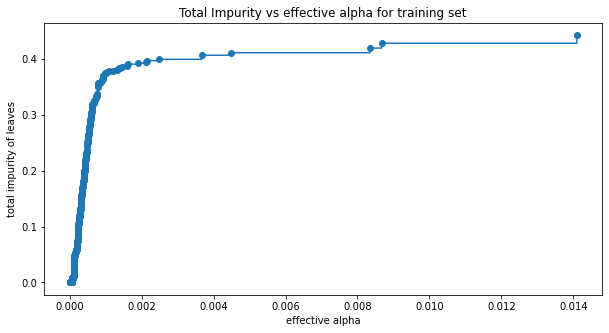

<IPython.core.display.Javascript object>

In [91]:
fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(ccp_alphas[:-1], impurities[:-1], marker="o", drawstyle="steps-post")
ax.set_xlabel("effective alpha")
ax.set_ylabel("total impurity of leaves")
ax.set_title("Total Impurity vs effective alpha for training set")
plt.show()

Next, we train a decision tree using the effective alphas. The last value
in ``ccp_alphas`` is the alpha value that prunes the whole tree,
leaving the tree, ``clfs[-1]``, with one node.

In [92]:
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(
        random_state=1, ccp_alpha=ccp_alpha, class_weight={0: 0.15, 1: 0.85}
    )
    clf.fit(X_train, y_train)
    clfs.append(clf)
print(
    "Number of nodes in the last tree is: {} with ccp_alpha: {}".format(
        clfs[-1].tree_.node_count, ccp_alphas[-1]
    )
)

Number of nodes in the last tree is: 1 with ccp_alpha: 0.05735035417016343


<IPython.core.display.Javascript object>


For the remainder, we remove the last element in
``clfs`` and ``ccp_alphas``, because it is the trivial tree with only one
node. Here we show that the number of nodes and tree depth decreases as alpha
increases.

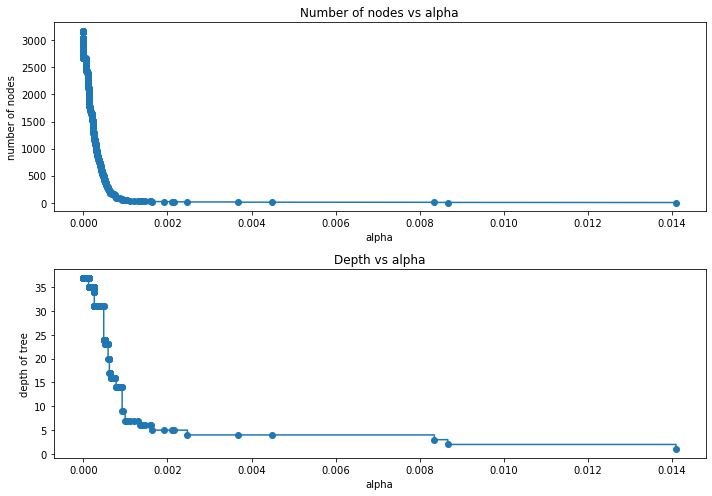

<IPython.core.display.Javascript object>

In [93]:
clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]

node_counts = [clf.tree_.node_count for clf in clfs]
depth = [clf.tree_.max_depth for clf in clfs]
fig, ax = plt.subplots(2, 1, figsize=(10, 7))
ax[0].plot(ccp_alphas, node_counts, marker="o", drawstyle="steps-post")
ax[0].set_xlabel("alpha")
ax[0].set_ylabel("number of nodes")
ax[0].set_title("Number of nodes vs alpha")
ax[1].plot(ccp_alphas, depth, marker="o", drawstyle="steps-post")
ax[1].set_xlabel("alpha")
ax[1].set_ylabel("depth of tree")
ax[1].set_title("Depth vs alpha")
fig.tight_layout()

In [94]:
recall_train = []
for clf in clfs:
    pred_train = clf.predict(X_train)
    values_train = recall_score(y_train, pred_train)
    recall_train.append(values_train)

<IPython.core.display.Javascript object>

In [95]:
recall_test = []
for clf in clfs:
    pred_test = clf.predict(X_test)
    values_test = recall_score(y_test, pred_test)
    recall_test.append(values_test)

<IPython.core.display.Javascript object>

In [96]:
train_scores = [clf.score(X_train, y_train) for clf in clfs]
test_scores = [clf.score(X_test, y_test) for clf in clfs]

<IPython.core.display.Javascript object>

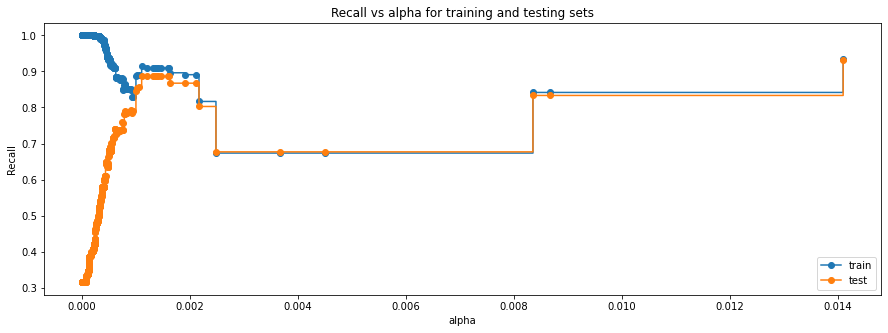

<IPython.core.display.Javascript object>

In [97]:
fig, ax = plt.subplots(figsize=(15, 5))
ax.set_xlabel("alpha")
ax.set_ylabel("Recall")
ax.set_title("Recall vs alpha for training and testing sets")
ax.plot(
    ccp_alphas, recall_train, marker="o", label="train", drawstyle="steps-post",
)
ax.plot(ccp_alphas, recall_test, marker="o", label="test", drawstyle="steps-post")
ax.legend()
plt.show()

**Maximum value of Recall is at 0.014 alpha, but if we choose decision tree will only have a root node and we would lose the buisness rules, instead we can choose alpha 0.002 retaining information and getting higher recall.**

In [98]:
# creating the model where we get highest train and test recall
index_best_model = np.argmax(recall_test)
best_model = clfs[index_best_model]
print(best_model)

DecisionTreeClassifier(ccp_alpha=0.014094867070919892,
                       class_weight={0: 0.15, 1: 0.85}, random_state=1)


<IPython.core.display.Javascript object>

In [99]:
best_model.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.014094867070919892,
                       class_weight={0: 0.15, 1: 0.85}, random_state=1)

<IPython.core.display.Javascript object>

#### checking performance on training set

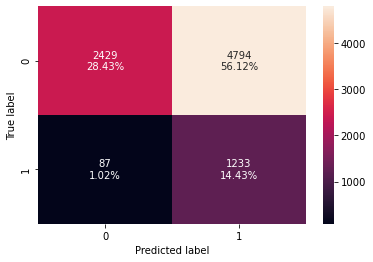

<IPython.core.display.Javascript object>

In [100]:
confusion_matrix_sklearn(best_model, X_train, y_train)

In [101]:
print("Recall Score:", get_recall_score(best_model, X_train, y_train))

Recall Score: 0.9340909090909091


<IPython.core.display.Javascript object>

#### checking performance on test set

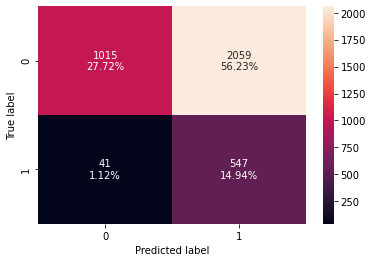

<IPython.core.display.Javascript object>

In [102]:
confusion_matrix_sklearn(best_model, X_test, y_test)

In [103]:
print("Recall Score:", get_recall_score(best_model, X_test, y_test))

Recall Score: 0.9302721088435374


<IPython.core.display.Javascript object>

### Visualizing the Decision Tree

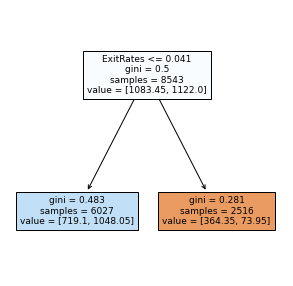

<IPython.core.display.Javascript object>

In [104]:
plt.figure(figsize=(5, 5))

out = tree.plot_tree(
    best_model,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=False,
    class_names=None,
)
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")
        arrow.set_linewidth(1)
plt.show()

* This model might be giving the highest recall but a buisness would not be able to use it to actually target the potential customers.

**Creating model with 0.002 ccp_alpha**

In [105]:
best_model2 = DecisionTreeClassifier(
    ccp_alpha=0.002, class_weight={0: 0.15, 1: 0.85}, random_state=1
)
best_model2.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.002, class_weight={0: 0.15, 1: 0.85},
                       random_state=1)

<IPython.core.display.Javascript object>

#### Checking performance on the training set

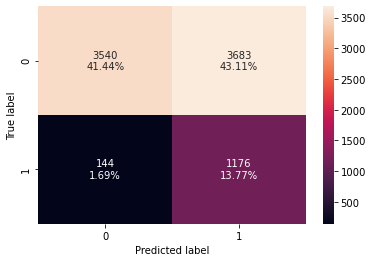

<IPython.core.display.Javascript object>

In [106]:
confusion_matrix_sklearn(best_model2, X_train, y_train)

In [107]:
decision_tree_postpruned_perf_train = get_recall_score(best_model2, X_train, y_train)
print("Recall Score:", decision_tree_postpruned_perf_train)

Recall Score: 0.8909090909090909


<IPython.core.display.Javascript object>

#### Checking performance on the test set

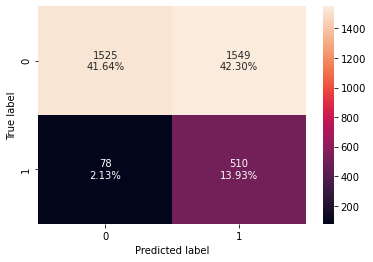

<IPython.core.display.Javascript object>

In [108]:
confusion_matrix_sklearn(best_model2, X_test, y_test)

In [109]:
decision_tree_postpruned_perf_test = get_recall_score(best_model2, X_test, y_test)
print("Recall Score:", decision_tree_postpruned_perf_test)

Recall Score: 0.8673469387755102


<IPython.core.display.Javascript object>

* The results have improved from the initial model. 
* The performance is comparable to the  hyperparameter tuned model.
* The model is giving a generalized performance on training and test set.

### Visualizing the Decision Tree

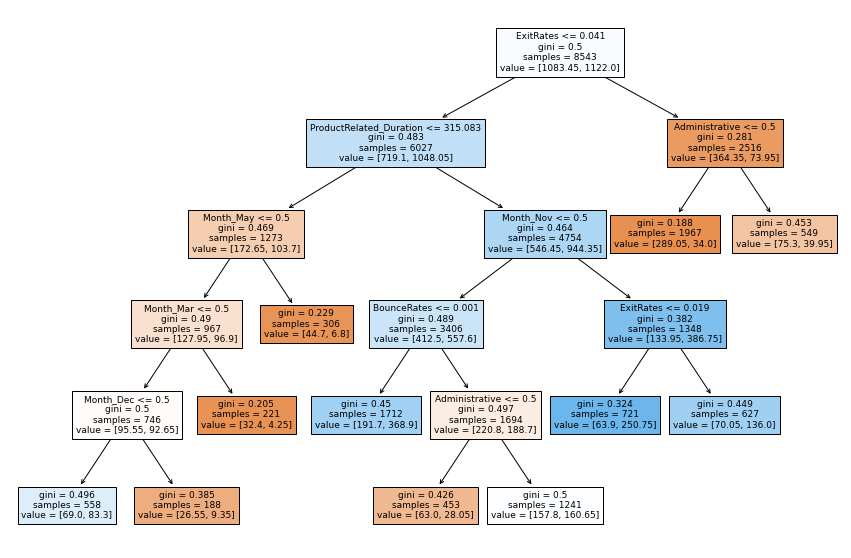

<IPython.core.display.Javascript object>

In [110]:
plt.figure(figsize=(15, 10))

out = tree.plot_tree(
    best_model2,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=False,
    class_names=None,
)
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")
        arrow.set_linewidth(1)
plt.show()

In [111]:
# Text report showing the rules of a decision tree -

print(tree.export_text(best_model2, feature_names=feature_names, show_weights=True))

|--- ExitRates <= 0.04
|   |--- ProductRelated_Duration <= 315.08
|   |   |--- Month_May <= 0.50
|   |   |   |--- Month_Mar <= 0.50
|   |   |   |   |--- Month_Dec <= 0.50
|   |   |   |   |   |--- weights: [69.00, 83.30] class: 1
|   |   |   |   |--- Month_Dec >  0.50
|   |   |   |   |   |--- weights: [26.55, 9.35] class: 0
|   |   |   |--- Month_Mar >  0.50
|   |   |   |   |--- weights: [32.40, 4.25] class: 0
|   |   |--- Month_May >  0.50
|   |   |   |--- weights: [44.70, 6.80] class: 0
|   |--- ProductRelated_Duration >  315.08
|   |   |--- Month_Nov <= 0.50
|   |   |   |--- BounceRates <= 0.00
|   |   |   |   |--- weights: [191.70, 368.90] class: 1
|   |   |   |--- BounceRates >  0.00
|   |   |   |   |--- Administrative <= 0.50
|   |   |   |   |   |--- weights: [63.00, 28.05] class: 0
|   |   |   |   |--- Administrative >  0.50
|   |   |   |   |   |--- weights: [157.80, 160.65] class: 1
|   |   |--- Month_Nov >  0.50
|   |   |   |--- ExitRates <= 0.02
|   |   |   |   |--- weights: [

<IPython.core.display.Javascript object>

In [112]:
# importance of features in the tree building ( The importance of a feature is computed as the
# (normalized) total reduction of the 'criterion' brought by that feature. It is also known as the Gini importance )

print(
    pd.DataFrame(
        best_model2.feature_importances_, columns=["Imp"], index=X_train.columns
    ).sort_values(by="Imp", ascending=False)
)

                                    Imp
ExitRates                      0.555544
ProductRelated_Duration        0.131677
Month_Nov                      0.080984
BounceRates                    0.077994
Administrative                 0.065073
Month_Mar                      0.036807
Month_May                      0.031719
Month_Dec                      0.020203
SpecialDay_0.4                 0.000000
OperatingSystems_2             0.000000
Browser_5                      0.000000
Browser_6                      0.000000
Browser_7                      0.000000
Browser_8                      0.000000
Browser_9                      0.000000
Browser_10                     0.000000
Browser_11                     0.000000
Browser_12                     0.000000
Browser_13                     0.000000
OperatingSystems_4             0.000000
OperatingSystems_3             0.000000
SpecialDay_0.6                 0.000000
OperatingSystems_5             0.000000
Browser_3                      0.000000


<IPython.core.display.Javascript object>

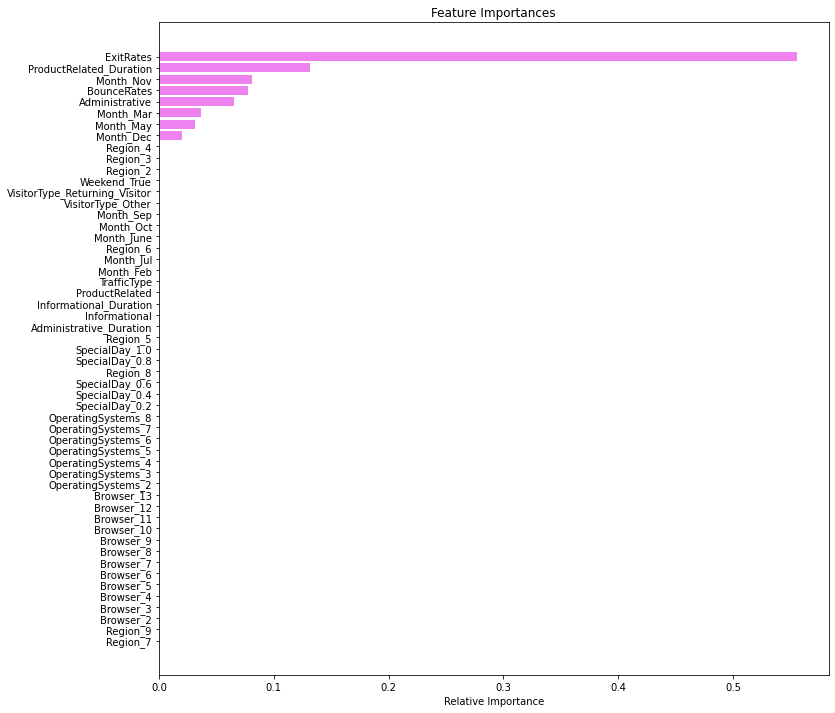

<IPython.core.display.Javascript object>

In [113]:
importances = best_model2.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

* Exit rates and ProductRelated duration are the top two important features to predict customer sessions contributing to Revenue.

### Comparing all the decision tree models

In [116]:
# training performance comparison

models_train_comp_df = pd.DataFrame(
    [
        decision_tree_perf_train,
        decision_tree_tune_perf_train,
        decision_tree_postpruned_perf_train,
    ],
    columns=["Recall on training set"],
)

print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


,Recall on training set
0,1.000000
1,0.906061
2,0.890909


<IPython.core.display.Javascript object>

In [117]:
# testing performance comparison

models_test_comp_df = pd.DataFrame(
    [
        decision_tree_perf_test,
        decision_tree_tune_perf_test,
        decision_tree_postpruned_perf_test,
    ],
    columns=["Recall on testing set"],
)

print("Test performance comparison:")
models_test_comp_df

Test performance comparison:


,Recall on testing set
0,0.314626
1,0.874150
2,0.867347


<IPython.core.display.Javascript object>

* Decision tree model with pre-pruning has given the best recall score on training data.
* The pre-pruned and the post-pruned models have reduced overfitting and the model is giving a generalized performance.

### Conclusions

- We analyzed the "Online Shoppers Purchasing Intention" using different techniques and used Decision Tree Classifier to build a predictive model for the same.
- The model built can be used to predict if a customer is going to contribute to Revenue generation (by purchasing) or not.
- We visualized different trees and their confusion matrix to get a better understanding of the model. Easy interpretation is one of the key benefits of Decision Trees.
- We verified the fact that how much less data preparation is needed for Decision Trees and such a simple model gave good results even with outliers and imbalanced classes which shows the robustness of Decision Trees.
- ExitRates, ProductRelated_Duration, Month_Nov and BounceRates are the most important variable in predicting the customers that will contribute to the revenue. 
- We established the importance of hyper-parameters/ pruning to reduce overfitting.

### Recommendations

* According to the decision tree model - 

    a) If a customer lands on a page with an exit rate greater than 0.041 there's a very high chance the customer will not be contributing to the revenue.

    b) If a customer lands on a page with an exit rate less than 0.041 and spends more than ~5 minutes on a product related page then there is a very high chance that the customer is going to buy something and contribute to the revenue.


* It is observed that the more time the customers spend on Administrative, Informational and ProductRelated pages more is the likelihood of them contributing to the revenue. Although the website can not control the time spent by customers it can enhance the user experience on the website to engage them more on the website.

* Browsing Customers - Employ the predictive model to predict potential customers (customers who can buy the product), Offer limited-time coupons/discounts on a real-time basis only to those customers. This can also be employed for the customers in months like March, May, November, and December, as in those months, the traffic is higher so these months have potential buying users.

* It is observed that most of the traffic that the website sees is on the non-special days, While there is little to none traffic and revenue sessions on special days - the website should initiate schemes/offers on the special days to attract more customers on such days.

* May and November were the months where the website saw the highest traffic with further data it should be investigated what portfolios were running in those months and an inspiration to create more such portfolios can be drawn and implemented.

* Customer retention - Member Loyalty programs initiatives like special discounts, coupons, etc can be provided.

* Better resource management - Regular days (Non-weekend) days is when the website sees the most traffic, resources such as customer care services can be allocated more for these days.

* Website should be made more friendly, easily accessible, and feasible for other operating systems and browsers as new visitors seem to struggle with administrative pages.

* Site Engagement - Version of the site for slower-internet users, Consistent and user-friendly mobile website design for more browsers and operating systems.